## Ensemble Assignment

### Import Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

## Data Information

### Purpose : 은행 신용 카드 서비스 이탈 고객 예측 

### Variable Information

- feature
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
 - Months_on_book : Period of relationship with bank
 - Total_Relationship_Count : Total no. of products held by the customer
 - Months_Inactive_12_mon : No. of months inactive in the last 12 months
 - Contacts_Count_12_mon : No. of Contacts in the last 12 months
 - Credit_Limit : Credit Limit on the Credit Card
 - Total_Revolving_Bal : Total Revolving Balance on the Credit Card
 - Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)
 - Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)
 - Total_Trans_Amt : Total Transaction Amount (Last 12 months)
 - Total_Trans_Ct : Total Transaction Count (Last 12 months)
 - Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)
 - Avg_Utilization_Ratio : Average Card Utilization Ratio

- target
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1
1. 은행 카드 서비스 담당자의 입장

2. 카드 서비스를 이용하는 고객의 입장

위 두 가지를 생각하면서 데이터를 분석하는 것은 어떨까요??

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

### Metrics

평가방식은 Logloss이기 때문에 predict_proba을 통해서 각 클래스의 예측 확률을 구하는 방식으로 에측을 해야합니다!

### Load Data

In [2]:
train = pd.read_csv('e_train.csv')
test = pd.read_csv('e_test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,F,1,Unknown,Divorced,Unknown,Blue,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,M,3,Uneducated,Single,$60K - $80K,Blue,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,M,0,Uneducated,Divorced,$80K - $120K,Blue,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,F,1,Graduate,Single,$40K - $60K,Blue,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,F,0,Uneducated,Married,Less than $40K,Blue,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0


In [4]:
test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,53,F,2,College,Single,Less than $40K,Blue,45,6,3,3,6210.0,1083,5127.0,0.621,3095,62,0.590,0.174
1,52,M,1,College,Married,$80K - $120K,Blue,48,4,3,3,2066.0,1601,465.0,0.742,1578,41,0.414,0.775
2,27,M,0,Unknown,Married,$40K - $60K,Blue,14,4,1,4,3823.0,2130,1693.0,0.371,2026,49,0.441,0.557
3,43,M,3,Unknown,Single,$60K - $80K,Blue,34,6,2,0,13771.0,2517,11254.0,0.501,1510,42,0.750,0.183
4,55,F,2,High School,Married,$40K - $60K,Blue,42,2,2,3,5431.0,2007,3424.0,0.661,4569,82,0.608,0.370


In [5]:
submission.head()

,id,Existing Customer,Attrited Customer
0,0,0,1
1,1,0,1
2,2,0,1
3,3,0,1
4,4,0,1


### Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Gender                    8101 non-null   object 
 2   Dependent_count           8101 non-null   int64  
 3   Education_Level           8101 non-null   object 
 4   Marital_Status            8101 non-null   object 
 5   Income_Category           8101 non-null   object 
 6   Card_Category             8101 non-null   object 
 7   Months_on_book            8101 non-null   int64  
 8   Total_Relationship_Count  8101 non-null   int64  
 9   Months_Inactive_12_mon    8101 non-null   int64  
 10  Contacts_Count_12_mon     8101 non-null   int64  
 11  Credit_Limit              8101 non-null   float64
 12  Total_Revolving_Bal       8101 non-null   int64  
 13  Avg_Open_To_Buy           8101 non-null   float64
 14  Total_Am

In [7]:
train.shape

(8101, 20)

In [8]:
test.shape

(2026, 19)

In [9]:
train.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

In [10]:
test.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### EDA

#### Missing Value

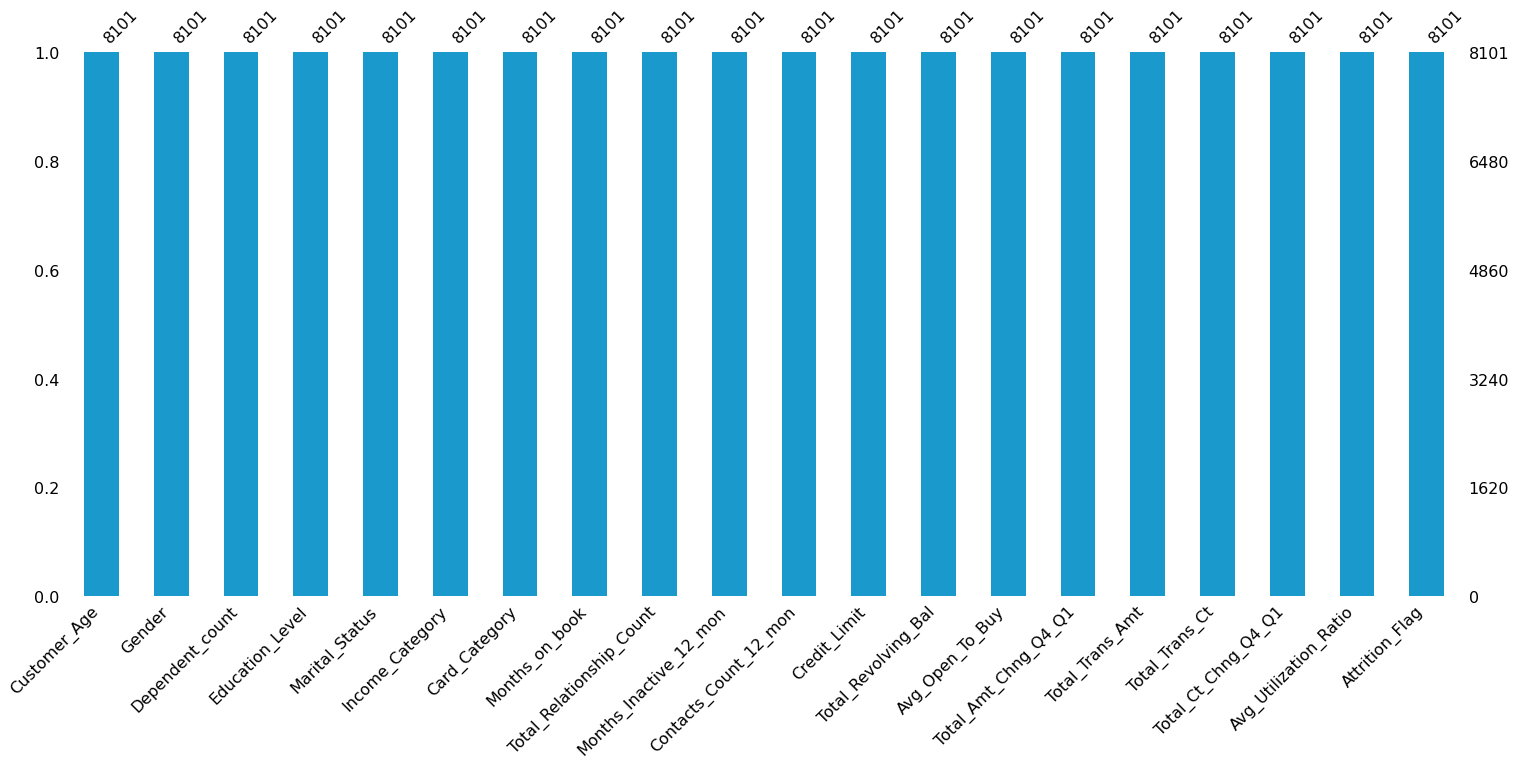

In [11]:
import missingno as msno

msno.bar(df=train, color=(0.1, 0.6, 0.8))
plt.show()

#### Target Distribution

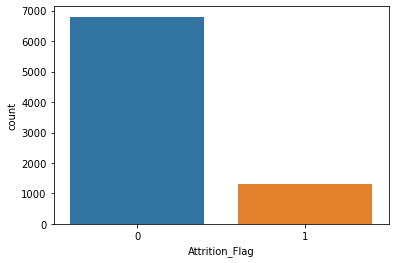

In [12]:
sns.countplot(train.iloc[:,-1])
plt.show()

- target distribution이 불균형

#### Categorical Variable

In [13]:
def categorical_plot(variable):
    
    fig, ax = plt.subplots(1,2, figsize = (10,5))
    c = sns.countplot(x = variable, data = train, ax = ax[0])
    c.set_xticklabels(c.get_xticklabels(), rotation = 45)
    train[variable].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10},ax=ax[1])

##### Gender

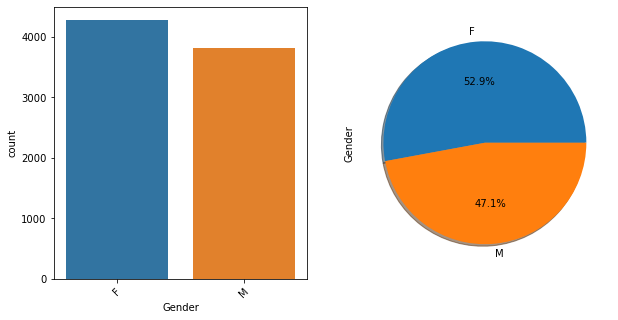

In [14]:
categorical_plot('Gender')

##### Education_Level

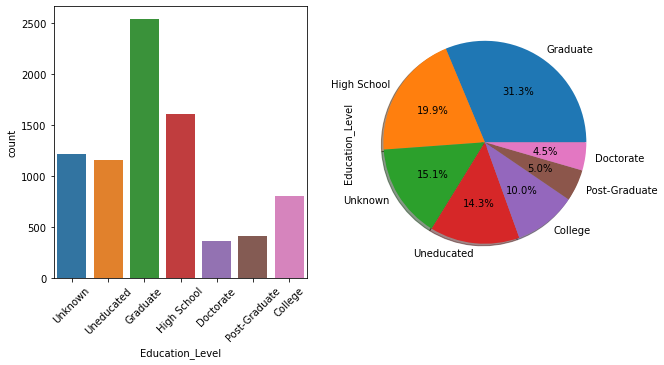

In [15]:
categorical_plot('Education_Level')

- Education_Level Graduate가 제일 많음.
- 학벌이 낮은 사람들이 더 많음.

##### Marital_Status

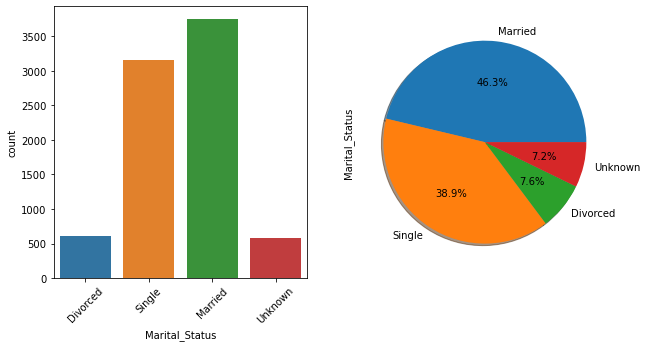

In [16]:
categorical_plot('Marital_Status')

- 결혼한 사람이 싱글보다 약간 많음.
- unknown은 알수없음??

##### Income_Category

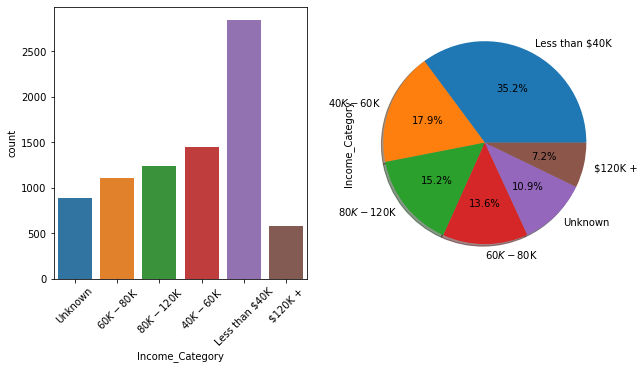

In [17]:
categorical_plot('Income_Category')

- 수입이 40K 이하가 제일 많이 분포

##### Card_Category

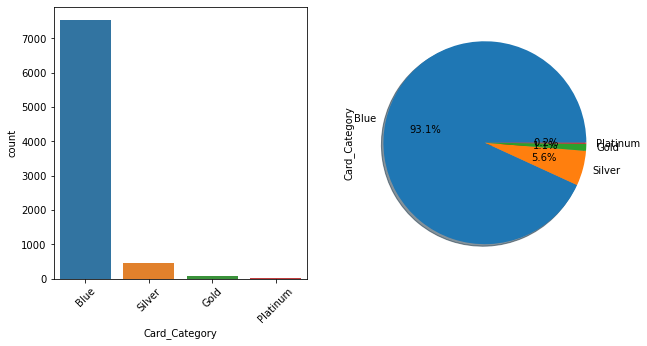

In [18]:
categorical_plot('Card_Category')

- Blue Card가 압도적으로 많음

#### Numerical Variable

In [19]:
def distplot(feature):
    plt.figure(figsize = (10,5))
    d = sns.distplot(train[feature], kde = True)
    d.set_title(f'{feature} Distribution')
    plt.show()

##### Customer_Age

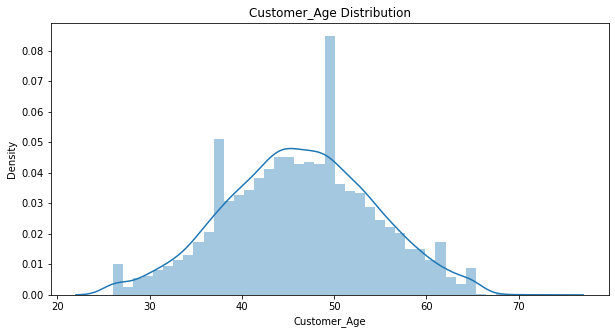

In [20]:
distplot('Customer_Age')

- 정규분포의 형태를 띄고 있지만 이상치가 있어보임.

##### Dependent_count

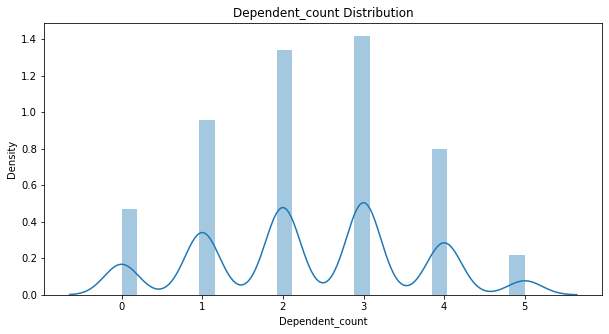

In [21]:
distplot('Dependent_count')

- 적당한 정규분포를 띄고 있음.

##### Months_on_book  

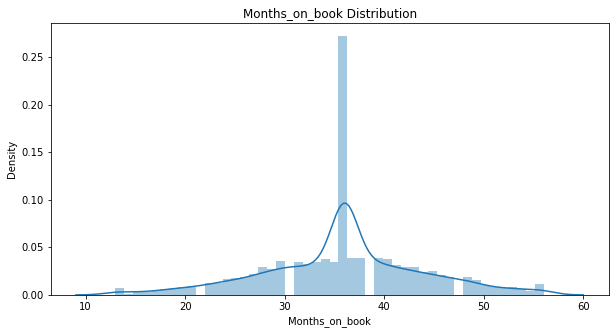

In [22]:
distplot('Months_on_book')

##### Total_Relationship_Count

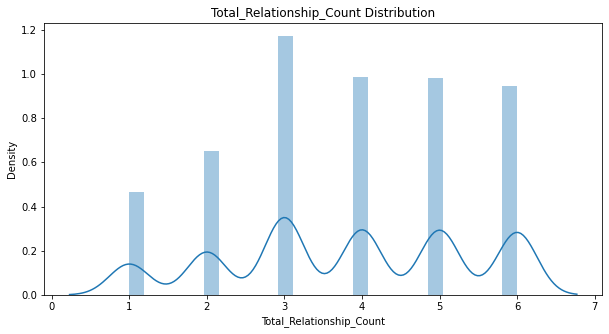

In [23]:
distplot('Total_Relationship_Count'
        
        )

##### Months_Inactive_12_mon

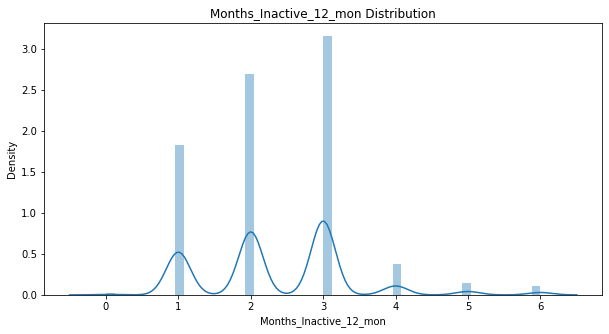

In [24]:
distplot('Months_Inactive_12_mon')

##### Contacts_Count_12_mon

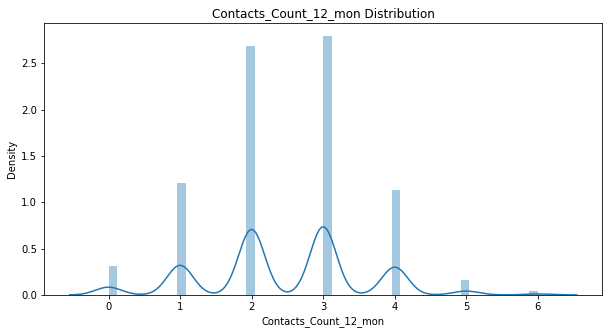

In [25]:
distplot('Contacts_Count_12_mon')

##### Credit_Limit

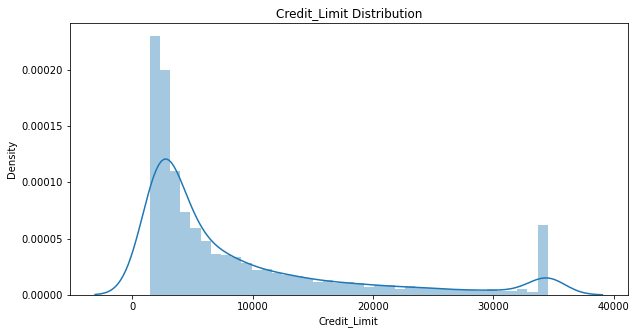

In [26]:
distplot('Credit_Limit')

- 왼쪽으로 쏠린 분포

##### Total_Revolving_Bal  

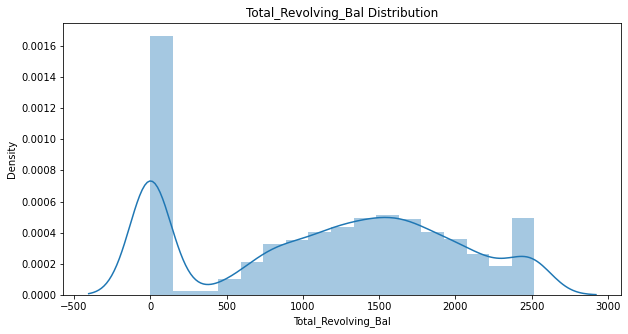

In [27]:
distplot('Total_Revolving_Bal')

- 분포가 한쪽으로 쏠려있음.



##### Avg_Open_To_Buy

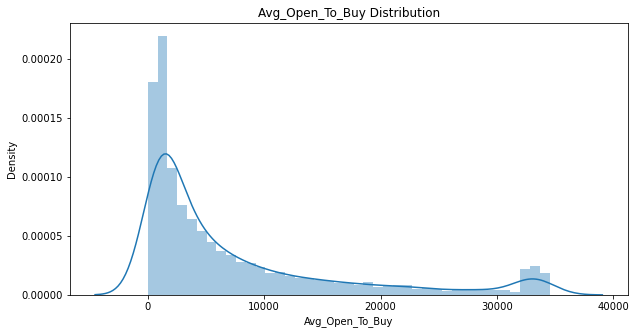

In [28]:
distplot('Avg_Open_To_Buy')

- 분포가 한쪽으로 쏠려있음.

##### Total_Amt_Chng_Q4_Q1

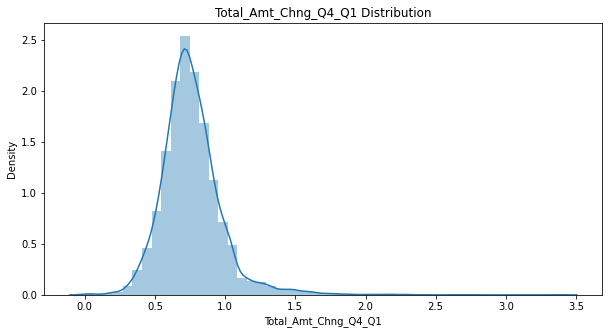

In [29]:
distplot('Total_Amt_Chng_Q4_Q1')

##### Total_Trans_Amt

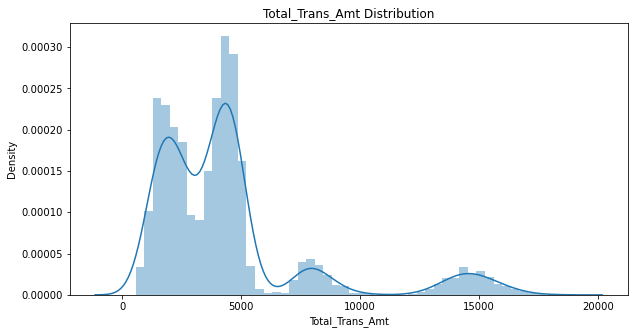

In [30]:
distplot('Total_Trans_Amt')

##### Total_Trans_Ct

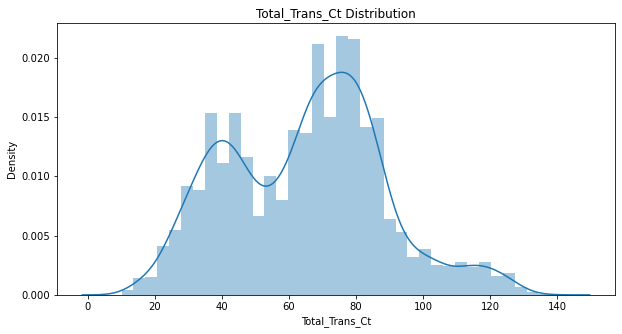

In [31]:
distplot('Total_Trans_Ct')

##### Total_Ct_Chng_Q4_Q1

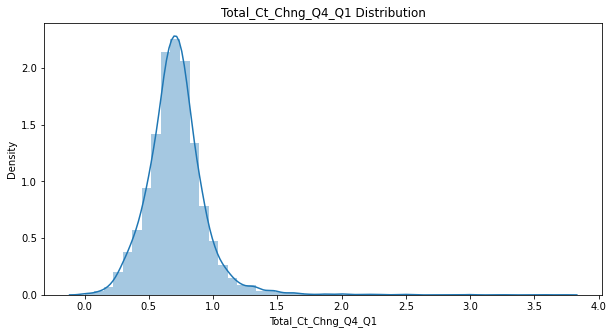

In [32]:
distplot('Total_Ct_Chng_Q4_Q1')

##### Avg_Utilization_Ratio

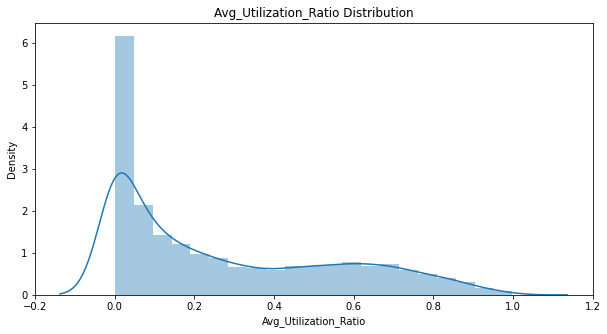

In [33]:
distplot('Avg_Utilization_Ratio')

####
- EDA를 통해 Numerical Variable들이 한쪽으로 쏠려있는 경향이 있음.

### Data Preprocessing

In [34]:
train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,F,1,Unknown,Divorced,Unknown,Blue,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,M,3,Uneducated,Single,$60K - $80K,Blue,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,M,0,Uneducated,Divorced,$80K - $120K,Blue,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,F,1,Graduate,Single,$40K - $60K,Blue,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,F,0,Uneducated,Married,Less than $40K,Blue,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0


#### Variable into list

In [35]:
categorical_columns = train.columns[train.dtypes == 'object']

numerical_columns = train.columns[train.dtypes != 'object']

#### Scaling 

- scaling을 안했을 때 점수가 더 높았음.

#### Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

cat_train = train[categorical_columns]
cat_test = test[categorical_columns]

for col in categorical_columns:
    encoder.fit(cat_train[col])
    train[col] = encoder.transform(cat_train[col])
    test[col] = encoder.transform(cat_test[col])   

### Model

In [37]:
X_data = train.iloc[:,:-1]
y_data = train.iloc[:,-1]

print(X_data.shape, y_data.shape)

(8101, 19) (8101,)


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = train_test_split(X_data, y_data, test_size=0.2
                                                  , random_state=2020, stratify = y_data)

In [80]:
clfs = []

#### Lgbm Classifier

In [40]:
from lightgbm import LGBMClassifier

from sklearn.metrics import log_loss

lgbm_clf = LGBMClassifier(random_state = 42, n_estimators = 500)

lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict_proba(X_dev)

print('Logloss Score : ', log_loss(y_dev, y_pred))

Logloss Score :  0.1429619572975821


#### Xgbm Classifier

In [41]:
from xgboost import XGBClassifier

xgbm_clf = XGBClassifier(random_state = 42, n_estimators = 500)

xgbm_clf.fit(X_train, y_train)
y_pred = xgbm_clf.predict_proba(X_dev)

print('Logloss Score : ', log_loss(y_dev, y_pred))

[20:24:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Logloss Score :  0.12393355592529226


In [81]:
clfs.append((type(xgbm_clf).__name__,xgbm_clf))

#### CatBoost

In [91]:
from catboost import CatBoostClassifier

CB_clf = CatBoostClassifier(random_state = 42)
CB_clf.fit(X_train, y_train)
CB_pred = CB_clf.predict_proba(X_dev)
logloss = log_loss(y_dev, y_pred)

print('Logloss Score : ', log_loss(y_dev, y_pred))

Learning rate set to 0.022881
0:	learn: 0.6637378	total: 3.42ms	remaining: 3.42s
1:	learn: 0.6370778	total: 6.58ms	remaining: 3.28s
2:	learn: 0.6110501	total: 9.84ms	remaining: 3.27s
3:	learn: 0.5812211	total: 12.8ms	remaining: 3.19s
4:	learn: 0.5543471	total: 15.9ms	remaining: 3.16s
5:	learn: 0.5327365	total: 18.8ms	remaining: 3.12s
6:	learn: 0.5117904	total: 21.6ms	remaining: 3.06s
7:	learn: 0.4934452	total: 24.3ms	remaining: 3.01s
8:	learn: 0.4769205	total: 26.9ms	remaining: 2.97s
9:	learn: 0.4587152	total: 29.7ms	remaining: 2.94s
10:	learn: 0.4442195	total: 32.3ms	remaining: 2.9s
11:	learn: 0.4293744	total: 34.9ms	remaining: 2.87s
12:	learn: 0.4187504	total: 37.7ms	remaining: 2.86s
13:	learn: 0.4068603	total: 40.3ms	remaining: 2.84s
14:	learn: 0.3893610	total: 42.9ms	remaining: 2.81s
15:	learn: 0.3817074	total: 45.6ms	remaining: 2.8s
16:	learn: 0.3715603	total: 48.2ms	remaining: 2.79s
17:	learn: 0.3583149	total: 50.7ms	remaining: 2.77s
18:	learn: 0.3481968	total: 53.6ms	remaining: 

192:	learn: 0.0942616	total: 574ms	remaining: 2.4s
193:	learn: 0.0940022	total: 577ms	remaining: 2.4s
194:	learn: 0.0937752	total: 580ms	remaining: 2.39s
195:	learn: 0.0934782	total: 583ms	remaining: 2.39s
196:	learn: 0.0932526	total: 586ms	remaining: 2.39s
197:	learn: 0.0930953	total: 589ms	remaining: 2.39s
198:	learn: 0.0927632	total: 593ms	remaining: 2.38s
199:	learn: 0.0924985	total: 595ms	remaining: 2.38s
200:	learn: 0.0922304	total: 598ms	remaining: 2.38s
201:	learn: 0.0917908	total: 601ms	remaining: 2.38s
202:	learn: 0.0915074	total: 605ms	remaining: 2.37s
203:	learn: 0.0911978	total: 607ms	remaining: 2.37s
204:	learn: 0.0910059	total: 611ms	remaining: 2.37s
205:	learn: 0.0907673	total: 613ms	remaining: 2.36s
206:	learn: 0.0905430	total: 616ms	remaining: 2.36s
207:	learn: 0.0903554	total: 619ms	remaining: 2.36s
208:	learn: 0.0902027	total: 623ms	remaining: 2.36s
209:	learn: 0.0899030	total: 626ms	remaining: 2.35s
210:	learn: 0.0895060	total: 629ms	remaining: 2.35s
211:	learn: 0.

392:	learn: 0.0605396	total: 1.15s	remaining: 1.78s
393:	learn: 0.0603603	total: 1.16s	remaining: 1.78s
394:	learn: 0.0602860	total: 1.16s	remaining: 1.77s
395:	learn: 0.0601844	total: 1.16s	remaining: 1.77s
396:	learn: 0.0600497	total: 1.16s	remaining: 1.77s
397:	learn: 0.0599751	total: 1.17s	remaining: 1.76s
398:	learn: 0.0598420	total: 1.17s	remaining: 1.76s
399:	learn: 0.0597371	total: 1.17s	remaining: 1.76s
400:	learn: 0.0596426	total: 1.17s	remaining: 1.75s
401:	learn: 0.0595065	total: 1.18s	remaining: 1.75s
402:	learn: 0.0594664	total: 1.18s	remaining: 1.75s
403:	learn: 0.0592944	total: 1.18s	remaining: 1.75s
404:	learn: 0.0591252	total: 1.19s	remaining: 1.74s
405:	learn: 0.0589645	total: 1.19s	remaining: 1.74s
406:	learn: 0.0588906	total: 1.19s	remaining: 1.74s
407:	learn: 0.0588271	total: 1.19s	remaining: 1.73s
408:	learn: 0.0587104	total: 1.2s	remaining: 1.73s
409:	learn: 0.0586219	total: 1.2s	remaining: 1.73s
410:	learn: 0.0585194	total: 1.2s	remaining: 1.73s
411:	learn: 0.0

590:	learn: 0.0428994	total: 1.73s	remaining: 1.2s
591:	learn: 0.0428561	total: 1.73s	remaining: 1.19s
592:	learn: 0.0428154	total: 1.74s	remaining: 1.19s
593:	learn: 0.0427646	total: 1.74s	remaining: 1.19s
594:	learn: 0.0426853	total: 1.74s	remaining: 1.19s
595:	learn: 0.0426396	total: 1.74s	remaining: 1.18s
596:	learn: 0.0426016	total: 1.75s	remaining: 1.18s
597:	learn: 0.0425249	total: 1.75s	remaining: 1.18s
598:	learn: 0.0424514	total: 1.75s	remaining: 1.17s
599:	learn: 0.0423871	total: 1.75s	remaining: 1.17s
600:	learn: 0.0423012	total: 1.76s	remaining: 1.17s
601:	learn: 0.0422507	total: 1.76s	remaining: 1.16s
602:	learn: 0.0422098	total: 1.76s	remaining: 1.16s
603:	learn: 0.0421555	total: 1.77s	remaining: 1.16s
604:	learn: 0.0420825	total: 1.77s	remaining: 1.15s
605:	learn: 0.0420313	total: 1.77s	remaining: 1.15s
606:	learn: 0.0419705	total: 1.77s	remaining: 1.15s
607:	learn: 0.0419209	total: 1.78s	remaining: 1.15s
608:	learn: 0.0418192	total: 1.78s	remaining: 1.14s
609:	learn: 0

792:	learn: 0.0318793	total: 2.31s	remaining: 604ms
793:	learn: 0.0318540	total: 2.32s	remaining: 602ms
794:	learn: 0.0318365	total: 2.32s	remaining: 599ms
795:	learn: 0.0318057	total: 2.32s	remaining: 596ms
796:	learn: 0.0317470	total: 2.33s	remaining: 593ms
797:	learn: 0.0316846	total: 2.33s	remaining: 590ms
798:	learn: 0.0316549	total: 2.33s	remaining: 587ms
799:	learn: 0.0316218	total: 2.34s	remaining: 584ms
800:	learn: 0.0315861	total: 2.34s	remaining: 581ms
801:	learn: 0.0315544	total: 2.34s	remaining: 578ms
802:	learn: 0.0315140	total: 2.35s	remaining: 576ms
803:	learn: 0.0314955	total: 2.35s	remaining: 573ms
804:	learn: 0.0314740	total: 2.35s	remaining: 570ms
805:	learn: 0.0314192	total: 2.35s	remaining: 567ms
806:	learn: 0.0313689	total: 2.36s	remaining: 564ms
807:	learn: 0.0313289	total: 2.36s	remaining: 561ms
808:	learn: 0.0312787	total: 2.36s	remaining: 558ms
809:	learn: 0.0312362	total: 2.37s	remaining: 555ms
810:	learn: 0.0312115	total: 2.37s	remaining: 552ms
811:	learn: 

986:	learn: 0.0249750	total: 2.89s	remaining: 38.1ms
987:	learn: 0.0249654	total: 2.89s	remaining: 35.2ms
988:	learn: 0.0249428	total: 2.9s	remaining: 32.2ms
989:	learn: 0.0249210	total: 2.9s	remaining: 29.3ms
990:	learn: 0.0249033	total: 2.9s	remaining: 26.4ms
991:	learn: 0.0248849	total: 2.91s	remaining: 23.4ms
992:	learn: 0.0248468	total: 2.91s	remaining: 20.5ms
993:	learn: 0.0248142	total: 2.91s	remaining: 17.6ms
994:	learn: 0.0247772	total: 2.91s	remaining: 14.6ms
995:	learn: 0.0247293	total: 2.92s	remaining: 11.7ms
996:	learn: 0.0247125	total: 2.92s	remaining: 8.79ms
997:	learn: 0.0246438	total: 2.92s	remaining: 5.86ms
998:	learn: 0.0246258	total: 2.93s	remaining: 2.93ms
999:	learn: 0.0245731	total: 2.93s	remaining: 0us
Logloss Score :  0.1518124610690205


In [82]:
clfs.append((type(CB_clf).__name__,CB_clf))

#### ADA Boost

In [45]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(random_state = 42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict_proba(X_dev)
logloss = log_loss(y_dev, y_pred)

print('Logloss Score : ', log_loss(y_dev, y_pred))

Logloss Score :  0.6047354785868475


In [83]:
clfs.append((type(ada_clf).__name__,ada_clf))

- tuning없이 진행했을 때, CatBoost가 성능이 제일 좋았음.

#### Lgbm Tune - Bayesian Optimization

In [48]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

evals = [(X_dev, y_dev)]

pbounds = {
    'n_estimators':(50,800),
    'learning_rate':(0.001,1.5),
    'max_depth':(2, 32),
    'num_leaves':(2, 64),
    'subsample':(0.5, 0.95),
    'colsample_bytree':(0.5, 0.95),
    'max_bin':(10, 500),
    'reg_lambda':(0.001, 50),
    'reg_alpha':(0.001, 50)
}
def lgbm_opt(n_estimators, learning_rate, max_depth, num_leaves,
             subsample, colsample_bytree, max_bin, reg_lambda, reg_alpha):
    params = {
        "n_estimators":int(round(n_estimators)), 
        "learning_rate":learning_rate,
        'max_depth':int(round(max_depth)),
        'num_leaves':int(round(num_leaves)),
        'subsample':max(min(subsample, 1), 0),
        'colsample_bytree':max(min(colsample_bytree, 1), 0),
        'reg_lambda': reg_lambda,
        'reg_alpha': reg_alpha,
        'max_bin':int(max_bin)
    }
    

    lgbm = LGBMClassifier(random_state=0, **params, n_jobs=-1)
    lgbm.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=False)
    score = cross_val_score(lgbm, X_train, y_train, scoring='roc_auc', cv=4, n_jobs=-1)
 
    return np.mean(score)

BO_lgbm = BayesianOptimization(f = lgbm_opt, pbounds = pbounds, random_state=0)
BO_lgbm.maximize(init_points=10, n_iter=10)

max_params_lgbm = BO_lgbm.max['params']
max_params_lgbm

|   iter    |  target   | colsam... | learni... |  max_bin  | max_depth | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.9806   |  0.747    |  1.073    |  305.4    |  18.35    |  367.7    |  42.05    |  21.88    |  44.59    |  0.9336   |
|  2        |  0.9807   |  0.6725   |  1.188    |  269.2    |  19.04    |  744.2    |  6.404    |  4.357    |  1.012    |  0.8747   |
|  3        |  0.9852   |  0.8502   |  1.305    |  489.5    |  25.97    |  396.1    |  50.39    |  5.915    |  32.0     |  0.5645   |
|  4        |  0.9722   |  0.9251   |  0.7833   |  213.2    |  9.937    |  630.7    |  30.28    |  28.42    |  0.9405   |  0.7779   |
|  5        |  0.9731   |  0.7754   |  0.9258   |  472.4    |  22.45    |  319.6    |  29.1     |  34.88    |  3.012    |  0.8      |
|  6        |  0.984    |  0.8018   |  0.3164   |  73.17    | 

{'colsample_bytree': 0.8177931728085376,
 'learning_rate': 0.4311716988528389,
 'max_bin': 327.6679091760277,
 'max_depth': 3.383847942335411,
 'n_estimators': 403.4150509633861,
 'num_leaves': 7.810097300395751,
 'reg_alpha': 1.7783227632535548,
 'reg_lambda': 24.684315012978296,
 'subsample': 0.8718698097688299}

In [49]:
max_params_lgbm['n_estimators'] = int(max_params_lgbm['n_estimators'])
max_params_lgbm['max_depth'] = int(max_params_lgbm['max_depth'])
max_params_lgbm['max_bin'] = int(max_params_lgbm['max_bin'])
max_params_lgbm['num_leaves'] = int(max_params_lgbm['num_leaves'])

In [50]:
lgbm_clf_tuned = LGBMClassifier(random_state = 0, **max_params_lgbm)

lgbm_clf_tuned.fit(X_train,y_train)
y_pred = lgbm_clf_tuned.predict_proba(X_dev)
logloss = log_loss(y_dev, y_pred)
print('Logloss Score : ', log_loss(y_dev, y_pred))

Logloss Score :  0.08856081258227748


In [84]:
clfs.append((type(lgbm_clf_tuned).__name__+'TUNED',lgbm_clf_tuned))

#### Lgbm - Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, make_scorer

LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

param = {
    'application': ['regression','binary'],
    'max_depth':[4,6,8],
    'n_estimators':range(100,701,300),
    'boosting' : ['gbdt','dart']
}

lgbm_grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param, cv=5, 
                           scoring=LogLoss,
                           verbose = 3,
                           return_train_score = True,
                           refit = True,
                           n_jobs=-1)

lgbm_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 149 out of 180 | elapsed:   24.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   38.9s finished


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


GridSearchCV(cv=5, estimator=LGBMClassifier(n_estimators=500, random_state=42),
             n_jobs=-1,
             param_grid={'application': ['regression', 'binary'],
                         'boosting': ['gbdt', 'dart'], 'max_depth': [4, 6, 8],
                         'n_estimators': range(100, 701, 300)},
             return_train_score=True,
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=3)

In [53]:
grid_lgbm = lgbm_grid_search.best_estimator_
grid_lgbm_pred = grid_lgbm.predict_proba(X_dev)
logloss = log_loss(y_dev, y_pred)
print(grid_lgbm.__class__.__name__,'Logloss Score:' , log_loss(y_dev, grid_lgbm_pred))

LGBMClassifier Logloss Score: 0.0865965726642679


In [85]:
clfs.append((type(grid_lgbm).__name__+'GRID',grid_lgbm))

#### XGB Tune - Bayesian Optimization

In [56]:
pbounds = { 'learning_rate': (0.01, 1.5),
            'n_estimators': (50, 100),
            'max_depth': (5,15),   
            'subsample': (0.8,0.95),   
            'gamma': (0, 5)}

def xgb_opt(learning_rate, n_estimators, max_depth, subsample, gamma):
    
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,  
        'gamma': gamma
    }
    
    xgb = XGBClassifier(**params, n_jobs=-1, random_state=0,early_stopping_rounds=10, eval_metric="logloss", eval_set=evals)
    score = cross_val_score(xgb, X_train, y_train, scoring='roc_auc', cv=4, n_jobs=-1)
    return np.mean(score)

BO_xgb = BayesianOptimization(f = xgb_opt, pbounds = pbounds, random_state=0)
BO_xgb.maximize(init_points=5, n_iter=5)

max_params_xgb = BO_xgb.max['params']
max_params_xgb

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
|  1        |  0.9866   |  2.744    |  1.076    |  11.03    |  77.24    |  0.8635   |
|  2        |  0.9884   |  3.229    |  0.662    |  13.92    |  98.18    |  0.8575   |
|  3        |  0.9866   |  3.959    |  0.7981   |  10.68    |  96.28    |  0.8107   |
|  4        |  0.9868   |  0.4356   |  0.04013  |  13.33    |  88.91    |  0.9305   |
|  5        |  0.985    |  4.893    |  1.201    |  9.615    |  89.03    |  0.8177   |
|  6        |  0.9905   |  2.164    |  0.6728   |  5.092    |  88.29    |  0.9144   |
|  7        |  0.99     |  3.377    |  0.3428   |  12.44    |  74.45    |  0.8582   |
|  8        |  0.9831   |  0.2088   |  0.03695  |  6.059    |  51.11    |  0.8116   |
|  9        |  0.9911   |  3.699    |  0.244    |  14.12    |  88.48    |  0.8127   |
|  10       |  0.9903   |  3.16     |  0.5445   |  8.0

{'gamma': 3.6989191266203507,
 'learning_rate': 0.2439920197716423,
 'max_depth': 14.118591190528651,
 'n_estimators': 88.48440323578049,
 'subsample': 0.8126571495993778}

In [57]:
max_params_xgb['n_estimators'] = int(max_params_xgb['n_estimators'])
max_params_xgb['max_depth'] = int(max_params_xgb['max_depth'])
xgb_clf = XGBClassifier(random_state = 0, **max_params_xgb)

In [58]:
xgb_clf_tuned = XGBClassifier(random_state = 0, **max_params_xgb)

xgb_clf_tuned.fit(X_train,y_train)
y_pred = xgb_clf_tuned.predict_proba(X_dev)
logloss = log_loss(y_dev, y_pred)
print('Logloss Score : ', log_loss(y_dev, y_pred))

[20:27:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Logloss Score :  0.10013358185581192


In [86]:
clfs.append((type(xgb_clf_tuned).__name__+'TUNED',xgb_clf_tuned))

#### XGB - Grid search

In [60]:
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

param = {
    'max_depth':[4,6,8],
    'n_estimators':range(500,901,200),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}

xgb_grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param, cv=5, 
                           scoring=LogLoss,
                           verbose = 3,
                           return_train_score = True,
                           refit = True,
                           n_jobs=-1)

xgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  2.9min


[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=100, score=(train=-0.020, test=-0.062), total=   0.2s
[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=400 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=400, score=(train=-0.000, test=-0.108), total=   0.7s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=700 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=8, n_estimators=700, score=(train=-0.000, test=-0.089), total=   1.3s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=700 
[

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=400 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=400, score=(train=-0.007, test=-0.053), total=   0.4s
[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=700 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=700, score=(train=-0.000, test=-0.150), total=   1.2s
[CV] application=regression, boosting=dart, max_depth=6, n_estimators=100 
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[CV]  application=regression, boosting=dart, max_depth=6, n_estimators=100, score=(train=-0.070, test=-0.107), total=   0.4s
[CV] application=regression, boosting=dart, max_depth=6, n_estimators=100 
[

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=100, score=(train=-0.054, test=-0.071), total=   0.1s
[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=100, score=(train=-0.017, test=-0.083), total=   0.2s
[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=400 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=400, score=(train=-0.000, test=-0.108), total=   0.7s
[CV] application=regression, boosting=dart, max_depth=4, n_estimators=100 
[

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=100, score=(train=-0.050, test=-0.083), total=   0.1s
[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=100, score=(train=-0.017, test=-0.098), total=   0.2s
[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=400 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=400, score=(train=-0.000, test=-0.138), total=   0.7s
[CV] application=regression, boosting=dart, max_depth=4, n_estimators=400 
[

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=400 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=400, score=(train=-0.004, test=-0.098), total=   0.4s
[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=700 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=700, score=(train=-0.000, test=-0.132), total=   1.2s
[CV] application=regression, boosting=dart, max_depth=6, n_estimators=400 
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[CV]  application=regression, boosting=dart, max_depth=6, n_estimators=400, score=(train=-0.021, test=-0.089), total=   4.7s
[CV] application=regression, boosting=dart, max_depth=6, n_estimators=400 
[

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=100, score=(train=-0.045, test=-0.097), total=   0.1s
[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=100, score=(train=-0.021, test=-0.077), total=   0.2s
[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=400 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=400, score=(train=-0.000, test=-0.094), total=   0.7s
[CV] application=regression, boosting=dart, max_depth=4, n_estimators=100 
[

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=100, score=(train=-0.049, test=-0.089), total=   0.1s
[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=100, score=(train=-0.019, test=-0.078), total=   0.2s
[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=700 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=700, score=(train=-0.000, test=-0.081), total=   1.1s
[CV] application=regression, boosting=dart, max_depth=4, n_estimators=700 
[

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=100, score=(train=-0.049, test=-0.081), total=   0.1s
[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=400 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=400, score=(train=-0.000, test=-0.067), total=   0.7s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=400 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=8, n_estimators=400, score=(train=-0.000, test=-0.169), total=   0.8s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=400 
[

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=700 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=700, score=(train=-0.001, test=-0.090), total=   0.7s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=8, n_estimators=100, score=(train=-0.011, test=-0.075), total=   0.2s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=400 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=8, n_estimators=400, score=(train=-0.000, test=-0.076), total=   1.0s
[CV] application=regression, boosting=dart, max_depth=6, n_estimators=400 
[

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=400 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=400, score=(train=-0.005, test=-0.080), total=   0.4s
[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=700 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=700, score=(train=-0.000, test=-0.151), total=   1.2s
[CV] application=regression, boosting=dart, max_depth=6, n_estimators=100 
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[CV]  application=regression, boosting=dart, max_depth=6, n_estimators=100, score=(train=-0.071, test=-0.106), total=   0.4s
[CV] application=regression, boosting=dart, max_depth=6, n_estimators=400 
[

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=400 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=400, score=(train=-0.004, test=-0.083), total=   0.4s
[CV] application=regression, boosting=gbdt, max_depth=6, n_estimators=700 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=6, n_estimators=700, score=(train=-0.000, test=-0.192), total=   1.1s
[CV] application=regression, boosting=dart, max_depth=6, n_estimators=100 
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[CV]  application=regression, boosting=dart, max_depth=6, n_estimators=100, score=(train=-0.074, test=-0.097), total=   0.4s
[CV] application=regression, boosting=dart, max_depth=6, n_estimators=100 
[

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=700 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=700, score=(train=-0.001, test=-0.059), total=   0.7s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=8, n_estimators=100, score=(train=-0.012, test=-0.059), total=   0.2s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=700 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=8, n_estimators=700, score=(train=-0.000, test=-0.154), total=   1.2s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=700 
[

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=700 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=700, score=(train=-0.000, test=-0.122), total=   0.7s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=8, n_estimators=100, score=(train=-0.010, test=-0.084), total=   0.3s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=8, n_estimators=100, score=(train=-0.009, test=-0.098), total=   0.2s
[CV] application=regression, boosting=dart, max_depth=4, n_estimators=400 
[

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=700 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=700, score=(train=-0.001, test=-0.095), total=   0.7s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=100 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=8, n_estimators=100, score=(train=-0.009, test=-0.087), total=   0.2s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=700 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=8, n_estimators=700, score=(train=-0.000, test=-0.139), total=   1.3s
[CV] application=regression, boosting=dart, max_depth=4, n_estimators=100 
[

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=700 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=700, score=(train=-0.000, test=-0.101), total=   0.7s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=400 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=8, n_estimators=400, score=(train=-0.000, test=-0.138), total=   0.8s
[CV] application=regression, boosting=gbdt, max_depth=8, n_estimators=400 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=8, n_estimators=400, score=(train=-0.000, test=-0.132), total=   0.8s
[CV] application=regression, boosting=dart, max_depth=8, n_estimators=100 
[

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[CV] application=regression, boosting=gbdt, max_depth=4, n_estimators=400 
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV]  application=regression, boosting=gbdt, max_depth=4, n_estimators=400, score=(train=-0.005, test=-0.074), total=   0.5s
[CV] application=regression, boosting=dart, max_depth=6, n_estimators=700 
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[CV]  application=regression, boosting=dart, max_depth=6, n_estimators=700, score=(train=-0.008, test=-0.056), total=  11.6s
[CV] application=regression, boosting=dart, max_depth=6, n_estimators=700 
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[CV]  application=regression, boosting=dart, max_depth=6, n_estimators=700, score=(train=-0.006, test=-0.090), total=  11.9s
[CV] application=binary, boosting=dart, max_depth=8, n_estimators=700 
[Ligh

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 12.8min finished


[20:40:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     gamma=3.6989191266203507, gpu_id=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.2439920197716423,
                                     max_delta_step=None, max_depth=14,
                                     min_child_weight=None, missing=nan,...
                                     scale_pos_weight=None,
                                     subsample=0.8126571495993778,
                                     tree_method=None, validate_parameters=None,
                                     ver

In [61]:
grid_xgb = xgb_grid_search.best_estimator_
grid_xgb_pred = grid_xgb.predict_proba(X_dev)
logloss = log_loss(y_dev, y_pred)
print(grid_xgb.__class__.__name__,'Logloss Score:' , log_loss(y_dev, grid_xgb_pred))

XGBClassifier Logloss Score: 0.08299353323069195


In [87]:
clfs.append((type(grid_xgb).__name__+'GRID',grid_xgb))

#### Lgbm - Bagging Classifier

In [63]:
from sklearn.ensemble import BaggingClassifier

lgbm_Bagging = BaggingClassifier(base_estimator=lgbm_clf,n_estimators=100,n_jobs=-1,max_samples=0.5,max_features=0.5,random_state=1).fit(X_train,y_train)
y_pred = lgbm_Bagging.predict_proba(X_dev)
logloss = log_loss(y_dev, y_pred)
print('Logloss Score : ', log_loss(y_dev, y_pred))

Logloss Score :  0.13359546913410883


#### CatBoost - Bagging Classifier

In [64]:
CB_Bagging = BaggingClassifier(base_estimator = CB_clf, n_estimators=50 ,n_jobs=-1,max_samples=0.5,max_features=0.5,random_state=1).fit(X_train, y_train)

y_pred = CB_Bagging.predict_proba(X_dev)
logloss = log_loss(y_dev, y_pred)
print('Logloss Score : ', log_loss(y_dev, y_pred))

[CV] colsample_bylevel=0.7, colsample_bytree=1, max_depth=4, n_estimators=500 
[20:33:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.7, colsample_bytree=1, max_depth=4, n_estimators=500, score=(train=-0.037, test=-0.093), total=  13.8s
[CV] colsample_bylevel=0.7, colsample_bytree=1, max_depth=4, n_estimators=700 
[20:34:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.7, colsample_bytree=1, max_depth=4, n_estimators=700, score=(train=-0.035, test=-0.075), total=  19.4s
[CV] colsample_bylevel=0.7, colsample_bytree=1, max_depth=6, n_estimators=700 
[

[CV] colsample_bylevel=1, colsample_bytree=0.5, max_depth=8, n_estimators=700 
[20:36:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=1, colsample_bytree=0.5, max_depth=8, n_estimators=700, score=(train=-0.032, test=-0.086), total=  41.9s
[CV] colsample_bylevel=1, colsample_bytree=0.7, max_depth=6, n_estimators=500 
[20:37:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=1, colsample_bytree=0.7, max_depth=6, n_estimators=500, score=(train=-0.034, test=-0.065), total=  22.6s
[CV] colsample_bylevel=1, colsample_bytree=0.7, max_depth=6, n_estimators=900 
[

[20:38:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=1, colsample_bytree=1, max_depth=6, n_estimators=500, score=(train=-0.032, test=-0.064), total=  24.6s
[CV] colsample_bylevel=1, colsample_bytree=1, max_depth=6, n_estimators=900 
[20:39:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=1, colsample_bytree=1, max_depth=6, n_estimators=900, score=(train=-0.027, test=-0.093), total=  44.6s
Learning rate set to 0.022881
0:	learn: 0.6740542	total: 55.4ms	remaining: 55.4s
1:	learn: 0.6546415	total: 59.8ms	remaining: 29.8s
2:	learn: 0.6373687	total: 65.7ms

[CV] colsample_bylevel=1, colsample_bytree=0.5, max_depth=8, n_estimators=700 
[20:36:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=1, colsample_bytree=0.5, max_depth=8, n_estimators=700, score=(train=-0.033, test=-0.087), total=  40.5s
[CV] colsample_bylevel=1, colsample_bytree=0.7, max_depth=4, n_estimators=900 
[20:37:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=1, colsample_bytree=0.7, max_depth=4, n_estimators=900, score=(train=-0.035, test=-0.079), total=  25.2s
[CV] colsample_bylevel=1, colsample_bytree=0.7, max_depth=6, n_estimators=700 
[

228:	learn: 0.2699795	total: 1.4s	remaining: 4.7s
229:	learn: 0.2695624	total: 1.4s	remaining: 4.7s
230:	learn: 0.2691489	total: 1.41s	remaining: 4.69s
231:	learn: 0.2687961	total: 1.41s	remaining: 4.68s
232:	learn: 0.2684003	total: 1.42s	remaining: 4.67s
233:	learn: 0.2681527	total: 1.42s	remaining: 4.66s
234:	learn: 0.2679743	total: 1.43s	remaining: 4.66s
235:	learn: 0.2677244	total: 1.44s	remaining: 4.65s
236:	learn: 0.2672702	total: 1.45s	remaining: 4.65s
237:	learn: 0.2670548	total: 1.45s	remaining: 4.64s
238:	learn: 0.2667902	total: 1.46s	remaining: 4.64s
239:	learn: 0.2664392	total: 1.46s	remaining: 4.63s
240:	learn: 0.2660201	total: 1.47s	remaining: 4.62s
241:	learn: 0.2657980	total: 1.47s	remaining: 4.61s
242:	learn: 0.2655445	total: 1.48s	remaining: 4.6s
243:	learn: 0.2653016	total: 1.48s	remaining: 4.59s
244:	learn: 0.2651136	total: 1.49s	remaining: 4.58s
245:	learn: 0.2648287	total: 1.5s	remaining: 4.58s
246:	learn: 0.2645987	total: 1.5s	remaining: 4.57s
247:	learn: 0.26431

255:	learn: 0.1767757	total: 1.63s	remaining: 4.72s
256:	learn: 0.1764923	total: 1.63s	remaining: 4.72s
257:	learn: 0.1763304	total: 1.64s	remaining: 4.71s
258:	learn: 0.1760200	total: 1.64s	remaining: 4.7s
259:	learn: 0.1758334	total: 1.65s	remaining: 4.69s
260:	learn: 0.1756382	total: 1.66s	remaining: 4.69s
261:	learn: 0.1752675	total: 1.66s	remaining: 4.67s
262:	learn: 0.1750292	total: 1.67s	remaining: 4.67s
263:	learn: 0.1748696	total: 1.67s	remaining: 4.66s
264:	learn: 0.1745705	total: 1.68s	remaining: 4.65s
265:	learn: 0.1743647	total: 1.68s	remaining: 4.65s
266:	learn: 0.1741451	total: 1.69s	remaining: 4.63s
267:	learn: 0.1739474	total: 1.7s	remaining: 4.63s
268:	learn: 0.1737407	total: 1.7s	remaining: 4.62s
269:	learn: 0.1735078	total: 1.71s	remaining: 4.62s
270:	learn: 0.1731378	total: 1.72s	remaining: 4.62s
271:	learn: 0.1729574	total: 1.72s	remaining: 4.61s
272:	learn: 0.1726137	total: 1.73s	remaining: 4.6s
273:	learn: 0.1724342	total: 1.74s	remaining: 4.6s
274:	learn: 0.172

266:	learn: 0.1973959	total: 1.79s	remaining: 4.9s
267:	learn: 0.1970722	total: 1.79s	remaining: 4.91s
268:	learn: 0.1968867	total: 1.8s	remaining: 4.89s
269:	learn: 0.1966475	total: 1.81s	remaining: 4.9s
270:	learn: 0.1963889	total: 1.82s	remaining: 4.89s
271:	learn: 0.1959618	total: 1.82s	remaining: 4.88s
272:	learn: 0.1956152	total: 1.83s	remaining: 4.87s
273:	learn: 0.1954167	total: 1.84s	remaining: 4.87s
274:	learn: 0.1952562	total: 1.84s	remaining: 4.85s
275:	learn: 0.1948691	total: 1.85s	remaining: 4.85s
276:	learn: 0.1947085	total: 1.85s	remaining: 4.84s
277:	learn: 0.1945024	total: 1.86s	remaining: 4.83s
278:	learn: 0.1941455	total: 1.86s	remaining: 4.82s
279:	learn: 0.1938929	total: 1.87s	remaining: 4.81s
280:	learn: 0.1936515	total: 1.88s	remaining: 4.8s
281:	learn: 0.1933455	total: 1.89s	remaining: 4.8s
282:	learn: 0.1931011	total: 1.89s	remaining: 4.79s
283:	learn: 0.1928597	total: 1.9s	remaining: 4.79s
284:	learn: 0.1925330	total: 1.9s	remaining: 4.78s
285:	learn: 0.19223

350:	learn: 0.0836175	total: 2.26s	remaining: 4.18s
351:	learn: 0.0834492	total: 2.27s	remaining: 4.18s
352:	learn: 0.0832762	total: 2.28s	remaining: 4.18s
353:	learn: 0.0831278	total: 2.29s	remaining: 4.17s
354:	learn: 0.0829133	total: 2.29s	remaining: 4.17s
355:	learn: 0.0827392	total: 2.3s	remaining: 4.17s
356:	learn: 0.0826241	total: 2.31s	remaining: 4.16s
357:	learn: 0.0823682	total: 2.31s	remaining: 4.15s
358:	learn: 0.0822086	total: 2.32s	remaining: 4.14s
359:	learn: 0.0820629	total: 2.33s	remaining: 4.14s
360:	learn: 0.0819379	total: 2.33s	remaining: 4.13s
361:	learn: 0.0817017	total: 2.34s	remaining: 4.13s
362:	learn: 0.0814955	total: 2.35s	remaining: 4.12s
363:	learn: 0.0813130	total: 2.35s	remaining: 4.11s
364:	learn: 0.0812055	total: 2.36s	remaining: 4.1s
365:	learn: 0.0810940	total: 2.36s	remaining: 4.1s
366:	learn: 0.0809469	total: 2.37s	remaining: 4.09s
367:	learn: 0.0807570	total: 2.38s	remaining: 4.08s
368:	learn: 0.0806152	total: 2.38s	remaining: 4.07s
369:	learn: 0.0

237:	learn: 0.0968545	total: 1.76s	remaining: 5.63s
238:	learn: 0.0966481	total: 1.76s	remaining: 5.62s
239:	learn: 0.0962050	total: 1.77s	remaining: 5.61s
240:	learn: 0.0958002	total: 1.78s	remaining: 5.6s
241:	learn: 0.0955210	total: 1.78s	remaining: 5.58s
242:	learn: 0.0952510	total: 1.79s	remaining: 5.57s
243:	learn: 0.0950520	total: 1.79s	remaining: 5.56s
244:	learn: 0.0947866	total: 1.8s	remaining: 5.55s
245:	learn: 0.0945887	total: 1.81s	remaining: 5.54s
246:	learn: 0.0942853	total: 1.81s	remaining: 5.54s
247:	learn: 0.0938337	total: 1.82s	remaining: 5.52s
248:	learn: 0.0935415	total: 1.83s	remaining: 5.52s
249:	learn: 0.0933399	total: 1.84s	remaining: 5.51s
250:	learn: 0.0931424	total: 1.84s	remaining: 5.5s
251:	learn: 0.0929535	total: 1.85s	remaining: 5.49s
252:	learn: 0.0927259	total: 1.85s	remaining: 5.48s
253:	learn: 0.0925103	total: 1.86s	remaining: 5.46s
254:	learn: 0.0922961	total: 1.87s	remaining: 5.46s
255:	learn: 0.0920825	total: 1.87s	remaining: 5.44s
256:	learn: 0.0

544:	learn: 0.1926444	total: 3.23s	remaining: 2.69s
545:	learn: 0.1924259	total: 3.23s	remaining: 2.69s
546:	learn: 0.1921960	total: 3.24s	remaining: 2.68s
547:	learn: 0.1920403	total: 3.25s	remaining: 2.68s
548:	learn: 0.1918780	total: 3.25s	remaining: 2.67s
549:	learn: 0.1917066	total: 3.26s	remaining: 2.67s
550:	learn: 0.1915454	total: 3.26s	remaining: 2.66s
551:	learn: 0.1914092	total: 3.27s	remaining: 2.65s
552:	learn: 0.1912841	total: 3.27s	remaining: 2.65s
553:	learn: 0.1911531	total: 3.28s	remaining: 2.64s
554:	learn: 0.1909525	total: 3.29s	remaining: 2.63s
555:	learn: 0.1908119	total: 3.29s	remaining: 2.63s
556:	learn: 0.1905938	total: 3.3s	remaining: 2.63s
557:	learn: 0.1904426	total: 3.31s	remaining: 2.62s
558:	learn: 0.1902400	total: 3.31s	remaining: 2.61s
559:	learn: 0.1901326	total: 3.32s	remaining: 2.61s
560:	learn: 0.1899116	total: 3.33s	remaining: 2.6s
561:	learn: 0.1897047	total: 3.33s	remaining: 2.6s
562:	learn: 0.1895181	total: 3.34s	remaining: 2.59s
563:	learn: 0.1

526:	learn: 0.0574644	total: 3.31s	remaining: 2.98s
527:	learn: 0.0572754	total: 3.33s	remaining: 2.97s
528:	learn: 0.0571389	total: 3.33s	remaining: 2.97s
529:	learn: 0.0570082	total: 3.34s	remaining: 2.96s
530:	learn: 0.0569285	total: 3.35s	remaining: 2.96s
531:	learn: 0.0568423	total: 3.35s	remaining: 2.95s
532:	learn: 0.0567024	total: 3.36s	remaining: 2.94s
533:	learn: 0.0566331	total: 3.37s	remaining: 2.94s
534:	learn: 0.0565040	total: 3.37s	remaining: 2.93s
535:	learn: 0.0564124	total: 3.38s	remaining: 2.92s
536:	learn: 0.0562740	total: 3.39s	remaining: 2.92s
537:	learn: 0.0561194	total: 3.39s	remaining: 2.91s
538:	learn: 0.0560481	total: 3.4s	remaining: 2.9s
539:	learn: 0.0559715	total: 3.4s	remaining: 2.9s
540:	learn: 0.0558454	total: 3.41s	remaining: 2.89s
541:	learn: 0.0557752	total: 3.41s	remaining: 2.88s
542:	learn: 0.0556709	total: 3.42s	remaining: 2.88s
543:	learn: 0.0555602	total: 3.43s	remaining: 2.87s
544:	learn: 0.0553957	total: 3.43s	remaining: 2.87s
545:	learn: 0.05

553:	learn: 0.0735816	total: 3.62s	remaining: 2.91s
554:	learn: 0.0734745	total: 3.63s	remaining: 2.91s
555:	learn: 0.0733273	total: 3.63s	remaining: 2.9s
556:	learn: 0.0731695	total: 3.64s	remaining: 2.89s
557:	learn: 0.0730321	total: 3.64s	remaining: 2.88s
558:	learn: 0.0728516	total: 3.65s	remaining: 2.88s
559:	learn: 0.0727139	total: 3.65s	remaining: 2.87s
560:	learn: 0.0726027	total: 3.66s	remaining: 2.86s
561:	learn: 0.0724499	total: 3.67s	remaining: 2.86s
562:	learn: 0.0723126	total: 3.67s	remaining: 2.85s
563:	learn: 0.0722312	total: 3.68s	remaining: 2.85s
564:	learn: 0.0720833	total: 3.69s	remaining: 2.84s
565:	learn: 0.0719854	total: 3.69s	remaining: 2.83s
566:	learn: 0.0718133	total: 3.7s	remaining: 2.83s
567:	learn: 0.0716408	total: 3.71s	remaining: 2.82s
568:	learn: 0.0714793	total: 3.71s	remaining: 2.81s
569:	learn: 0.0712676	total: 3.72s	remaining: 2.81s
570:	learn: 0.0711887	total: 3.72s	remaining: 2.8s
571:	learn: 0.0710774	total: 3.73s	remaining: 2.79s
572:	learn: 0.0

582:	learn: 0.1353799	total: 3.9s	remaining: 2.79s
583:	learn: 0.1352941	total: 3.9s	remaining: 2.78s
584:	learn: 0.1351577	total: 3.91s	remaining: 2.77s
585:	learn: 0.1349928	total: 3.91s	remaining: 2.77s
586:	learn: 0.1348914	total: 3.92s	remaining: 2.76s
587:	learn: 0.1348312	total: 3.93s	remaining: 2.75s
588:	learn: 0.1347109	total: 3.93s	remaining: 2.74s
589:	learn: 0.1346139	total: 3.94s	remaining: 2.74s
590:	learn: 0.1345012	total: 3.94s	remaining: 2.73s
591:	learn: 0.1343427	total: 3.95s	remaining: 2.72s
592:	learn: 0.1342296	total: 3.96s	remaining: 2.72s
593:	learn: 0.1341283	total: 3.96s	remaining: 2.71s
594:	learn: 0.1339965	total: 3.97s	remaining: 2.7s
595:	learn: 0.1338092	total: 3.98s	remaining: 2.7s
596:	learn: 0.1336144	total: 3.98s	remaining: 2.69s
597:	learn: 0.1334849	total: 3.99s	remaining: 2.68s
598:	learn: 0.1333890	total: 4s	remaining: 2.68s
599:	learn: 0.1332845	total: 4s	remaining: 2.67s
600:	learn: 0.1330706	total: 4.01s	remaining: 2.66s
601:	learn: 0.1329601	

553:	learn: 0.0479062	total: 3.96s	remaining: 3.19s
554:	learn: 0.0477690	total: 3.97s	remaining: 3.18s
555:	learn: 0.0477027	total: 3.98s	remaining: 3.17s
556:	learn: 0.0475842	total: 3.98s	remaining: 3.17s
557:	learn: 0.0474935	total: 3.99s	remaining: 3.16s
558:	learn: 0.0473851	total: 4s	remaining: 3.15s
559:	learn: 0.0473231	total: 4s	remaining: 3.15s
560:	learn: 0.0472481	total: 4.01s	remaining: 3.14s
561:	learn: 0.0471687	total: 4.02s	remaining: 3.13s
562:	learn: 0.0471240	total: 4.03s	remaining: 3.13s
563:	learn: 0.0470484	total: 4.03s	remaining: 3.12s
564:	learn: 0.0469645	total: 4.04s	remaining: 3.11s
565:	learn: 0.0468558	total: 4.04s	remaining: 3.1s
566:	learn: 0.0467510	total: 4.05s	remaining: 3.1s
567:	learn: 0.0466497	total: 4.06s	remaining: 3.09s
568:	learn: 0.0465488	total: 4.07s	remaining: 3.08s
569:	learn: 0.0464873	total: 4.07s	remaining: 3.07s
570:	learn: 0.0463995	total: 4.08s	remaining: 3.06s
571:	learn: 0.0462991	total: 4.08s	remaining: 3.06s
572:	learn: 0.046209

860:	learn: 0.1430107	total: 5.13s	remaining: 828ms
861:	learn: 0.1429247	total: 5.13s	remaining: 822ms
862:	learn: 0.1428181	total: 5.14s	remaining: 816ms
863:	learn: 0.1426897	total: 5.14s	remaining: 810ms
864:	learn: 0.1425040	total: 5.15s	remaining: 804ms
865:	learn: 0.1423983	total: 5.16s	remaining: 798ms
866:	learn: 0.1422654	total: 5.17s	remaining: 792ms
867:	learn: 0.1421784	total: 5.17s	remaining: 786ms
868:	learn: 0.1420877	total: 5.18s	remaining: 781ms
869:	learn: 0.1420275	total: 5.18s	remaining: 774ms
870:	learn: 0.1417664	total: 5.19s	remaining: 769ms
871:	learn: 0.1416682	total: 5.2s	remaining: 763ms
872:	learn: 0.1415921	total: 5.2s	remaining: 757ms
873:	learn: 0.1414223	total: 5.21s	remaining: 751ms
874:	learn: 0.1412055	total: 5.21s	remaining: 745ms
875:	learn: 0.1411338	total: 5.22s	remaining: 739ms
876:	learn: 0.1409490	total: 5.22s	remaining: 733ms
877:	learn: 0.1408875	total: 5.23s	remaining: 727ms
878:	learn: 0.1408299	total: 5.23s	remaining: 721ms
879:	learn: 0.

860:	learn: 0.0860884	total: 5.27s	remaining: 850ms
861:	learn: 0.0860128	total: 5.27s	remaining: 844ms
862:	learn: 0.0859372	total: 5.28s	remaining: 838ms
863:	learn: 0.0858619	total: 5.28s	remaining: 831ms
864:	learn: 0.0856936	total: 5.29s	remaining: 825ms
865:	learn: 0.0856454	total: 5.29s	remaining: 819ms
866:	learn: 0.0855494	total: 5.3s	remaining: 813ms
867:	learn: 0.0855012	total: 5.3s	remaining: 807ms
868:	learn: 0.0854472	total: 5.31s	remaining: 801ms
869:	learn: 0.0854169	total: 5.32s	remaining: 795ms
870:	learn: 0.0853384	total: 5.33s	remaining: 789ms
871:	learn: 0.0852019	total: 5.33s	remaining: 782ms
872:	learn: 0.0851464	total: 5.34s	remaining: 777ms
873:	learn: 0.0849676	total: 5.34s	remaining: 771ms
874:	learn: 0.0849018	total: 5.35s	remaining: 765ms
875:	learn: 0.0848488	total: 5.36s	remaining: 758ms
876:	learn: 0.0847822	total: 5.36s	remaining: 752ms
877:	learn: 0.0847001	total: 5.37s	remaining: 746ms
878:	learn: 0.0846049	total: 5.37s	remaining: 740ms
879:	learn: 0.

842:	learn: 0.0578588	total: 5.26s	remaining: 980ms
843:	learn: 0.0577404	total: 5.26s	remaining: 973ms
844:	learn: 0.0576834	total: 5.27s	remaining: 967ms
845:	learn: 0.0576261	total: 5.28s	remaining: 961ms
846:	learn: 0.0575714	total: 5.28s	remaining: 954ms
847:	learn: 0.0575097	total: 5.29s	remaining: 948ms
848:	learn: 0.0574326	total: 5.29s	remaining: 942ms
849:	learn: 0.0573879	total: 5.3s	remaining: 935ms
850:	learn: 0.0573035	total: 5.3s	remaining: 929ms
851:	learn: 0.0572498	total: 5.31s	remaining: 923ms
852:	learn: 0.0571741	total: 5.32s	remaining: 917ms
853:	learn: 0.0571196	total: 5.32s	remaining: 910ms
854:	learn: 0.0570138	total: 5.33s	remaining: 904ms
855:	learn: 0.0569379	total: 5.33s	remaining: 898ms
856:	learn: 0.0568739	total: 5.34s	remaining: 892ms
857:	learn: 0.0568248	total: 5.35s	remaining: 885ms
858:	learn: 0.0567352	total: 5.36s	remaining: 879ms
859:	learn: 0.0566471	total: 5.36s	remaining: 873ms
860:	learn: 0.0565202	total: 5.37s	remaining: 867ms
861:	learn: 0.

896:	learn: 0.1214889	total: 5.85s	remaining: 671ms
897:	learn: 0.1214068	total: 5.85s	remaining: 665ms
898:	learn: 0.1212572	total: 5.86s	remaining: 658ms
899:	learn: 0.1212036	total: 5.87s	remaining: 652ms
900:	learn: 0.1210606	total: 5.88s	remaining: 646ms
901:	learn: 0.1209603	total: 5.88s	remaining: 639ms
902:	learn: 0.1208107	total: 5.89s	remaining: 632ms
903:	learn: 0.1206714	total: 5.89s	remaining: 626ms
904:	learn: 0.1205212	total: 5.9s	remaining: 619ms
905:	learn: 0.1203781	total: 5.9s	remaining: 612ms
906:	learn: 0.1201899	total: 5.91s	remaining: 606ms
907:	learn: 0.1200582	total: 5.91s	remaining: 599ms
908:	learn: 0.1198795	total: 5.92s	remaining: 593ms
909:	learn: 0.1197497	total: 5.93s	remaining: 586ms
910:	learn: 0.1196629	total: 5.93s	remaining: 580ms
911:	learn: 0.1195483	total: 5.94s	remaining: 573ms
912:	learn: 0.1194963	total: 5.95s	remaining: 567ms
913:	learn: 0.1193966	total: 5.95s	remaining: 560ms
914:	learn: 0.1193151	total: 5.96s	remaining: 554ms
915:	learn: 0.

860:	learn: 0.1037890	total: 5.8s	remaining: 936ms
861:	learn: 0.1036786	total: 5.8s	remaining: 929ms
862:	learn: 0.1036324	total: 5.81s	remaining: 922ms
863:	learn: 0.1035169	total: 5.81s	remaining: 915ms
864:	learn: 0.1034383	total: 5.82s	remaining: 908ms
865:	learn: 0.1032821	total: 5.83s	remaining: 902ms
866:	learn: 0.1031399	total: 5.83s	remaining: 895ms
867:	learn: 0.1030707	total: 5.84s	remaining: 888ms
868:	learn: 0.1029847	total: 5.84s	remaining: 881ms
869:	learn: 0.1028613	total: 5.85s	remaining: 875ms
870:	learn: 0.1028188	total: 5.86s	remaining: 868ms
871:	learn: 0.1027102	total: 5.87s	remaining: 861ms
872:	learn: 0.1026338	total: 5.87s	remaining: 854ms
873:	learn: 0.1025624	total: 5.88s	remaining: 847ms
874:	learn: 0.1025042	total: 5.88s	remaining: 840ms
875:	learn: 0.1024365	total: 5.89s	remaining: 834ms
876:	learn: 0.1023684	total: 5.9s	remaining: 827ms
877:	learn: 0.1022775	total: 5.9s	remaining: 820ms
878:	learn: 0.1021369	total: 5.91s	remaining: 814ms
879:	learn: 0.10

905:	learn: 0.0319885	total: 6.28s	remaining: 651ms
906:	learn: 0.0319473	total: 6.29s	remaining: 645ms
907:	learn: 0.0318997	total: 6.29s	remaining: 638ms
908:	learn: 0.0318402	total: 6.3s	remaining: 631ms
909:	learn: 0.0317920	total: 6.3s	remaining: 624ms
910:	learn: 0.0317154	total: 6.31s	remaining: 617ms
911:	learn: 0.0316768	total: 6.32s	remaining: 610ms
912:	learn: 0.0316270	total: 6.33s	remaining: 603ms
913:	learn: 0.0316046	total: 6.34s	remaining: 597ms
914:	learn: 0.0315700	total: 6.35s	remaining: 590ms
915:	learn: 0.0315320	total: 6.35s	remaining: 583ms
916:	learn: 0.0314702	total: 6.36s	remaining: 576ms
917:	learn: 0.0314293	total: 6.37s	remaining: 569ms
918:	learn: 0.0313980	total: 6.37s	remaining: 562ms
919:	learn: 0.0313630	total: 6.38s	remaining: 555ms
920:	learn: 0.0313163	total: 6.39s	remaining: 548ms
921:	learn: 0.0312910	total: 6.39s	remaining: 541ms
922:	learn: 0.0312455	total: 6.4s	remaining: 534ms
923:	learn: 0.0311773	total: 6.41s	remaining: 527ms
924:	learn: 0.0

887:	learn: 0.0348270	total: 6.43s	remaining: 811ms
888:	learn: 0.0347790	total: 6.43s	remaining: 803ms
889:	learn: 0.0346799	total: 6.44s	remaining: 796ms
890:	learn: 0.0346302	total: 6.45s	remaining: 789ms
891:	learn: 0.0345546	total: 6.46s	remaining: 782ms
892:	learn: 0.0345153	total: 6.46s	remaining: 775ms
893:	learn: 0.0344391	total: 6.47s	remaining: 767ms
894:	learn: 0.0343510	total: 6.48s	remaining: 760ms
895:	learn: 0.0342995	total: 6.48s	remaining: 753ms
896:	learn: 0.0342357	total: 6.49s	remaining: 745ms
897:	learn: 0.0341985	total: 6.5s	remaining: 738ms
898:	learn: 0.0341411	total: 6.5s	remaining: 731ms
899:	learn: 0.0340576	total: 6.51s	remaining: 723ms
900:	learn: 0.0340153	total: 6.51s	remaining: 716ms
901:	learn: 0.0339551	total: 6.52s	remaining: 709ms
902:	learn: 0.0339109	total: 6.53s	remaining: 702ms
903:	learn: 0.0338537	total: 6.54s	remaining: 694ms
904:	learn: 0.0337990	total: 6.55s	remaining: 687ms
905:	learn: 0.0337422	total: 6.56s	remaining: 680ms
906:	learn: 0.

176:	learn: 0.2629098	total: 1.11s	remaining: 5.16s
177:	learn: 0.2625486	total: 1.11s	remaining: 5.15s
178:	learn: 0.2621017	total: 1.12s	remaining: 5.16s
179:	learn: 0.2617725	total: 1.13s	remaining: 5.15s
180:	learn: 0.2614667	total: 1.14s	remaining: 5.14s
181:	learn: 0.2611537	total: 1.14s	remaining: 5.13s
182:	learn: 0.2608621	total: 1.15s	remaining: 5.13s
183:	learn: 0.2605814	total: 1.15s	remaining: 5.11s
184:	learn: 0.2601144	total: 1.16s	remaining: 5.11s
185:	learn: 0.2597411	total: 1.17s	remaining: 5.1s
186:	learn: 0.2594116	total: 1.17s	remaining: 5.1s
187:	learn: 0.2592371	total: 1.18s	remaining: 5.08s
188:	learn: 0.2588541	total: 1.19s	remaining: 5.09s
189:	learn: 0.2585488	total: 1.19s	remaining: 5.08s
190:	learn: 0.2582578	total: 1.2s	remaining: 5.08s
191:	learn: 0.2579859	total: 1.21s	remaining: 5.09s
192:	learn: 0.2577719	total: 1.21s	remaining: 5.08s
193:	learn: 0.2575477	total: 1.22s	remaining: 5.08s
194:	learn: 0.2570576	total: 1.23s	remaining: 5.07s
195:	learn: 0.2

Learning rate set to 0.022881
0:	learn: 0.6663037	total: 83.8ms	remaining: 1m 23s
1:	learn: 0.6420284	total: 90.8ms	remaining: 45.3s
2:	learn: 0.6178071	total: 95.3ms	remaining: 31.7s
3:	learn: 0.5956502	total: 100ms	remaining: 24.9s
4:	learn: 0.5764632	total: 105ms	remaining: 21s
5:	learn: 0.5563155	total: 110ms	remaining: 18.2s
6:	learn: 0.5365291	total: 117ms	remaining: 16.6s
7:	learn: 0.5189201	total: 121ms	remaining: 15s
8:	learn: 0.5018322	total: 129ms	remaining: 14.2s
9:	learn: 0.4830435	total: 134ms	remaining: 13.2s
10:	learn: 0.4676876	total: 141ms	remaining: 12.7s
11:	learn: 0.4546030	total: 146ms	remaining: 12s
12:	learn: 0.4395042	total: 155ms	remaining: 11.7s
13:	learn: 0.4281703	total: 159ms	remaining: 11.2s
14:	learn: 0.4179319	total: 167ms	remaining: 10.9s
15:	learn: 0.4079604	total: 171ms	remaining: 10.5s
16:	learn: 0.3995990	total: 177ms	remaining: 10.2s
17:	learn: 0.3906576	total: 181ms	remaining: 9.9s
18:	learn: 0.3831043	total: 186ms	remaining: 9.61s
19:	learn: 0.3

177:	learn: 0.1533320	total: 1.33s	remaining: 6.13s
178:	learn: 0.1530642	total: 1.33s	remaining: 6.11s
179:	learn: 0.1528109	total: 1.34s	remaining: 6.11s
180:	learn: 0.1523658	total: 1.35s	remaining: 6.09s
181:	learn: 0.1520677	total: 1.35s	remaining: 6.08s
182:	learn: 0.1517482	total: 1.36s	remaining: 6.08s
183:	learn: 0.1513233	total: 1.37s	remaining: 6.07s
184:	learn: 0.1510700	total: 1.38s	remaining: 6.09s
185:	learn: 0.1505815	total: 1.39s	remaining: 6.08s
186:	learn: 0.1503417	total: 1.4s	remaining: 6.08s
187:	learn: 0.1500798	total: 1.4s	remaining: 6.06s
188:	learn: 0.1496648	total: 1.41s	remaining: 6.06s
189:	learn: 0.1493650	total: 1.42s	remaining: 6.06s
190:	learn: 0.1490047	total: 1.43s	remaining: 6.05s
191:	learn: 0.1487413	total: 1.44s	remaining: 6.08s
192:	learn: 0.1484811	total: 1.45s	remaining: 6.06s
193:	learn: 0.1483307	total: 1.46s	remaining: 6.06s
194:	learn: 0.1479680	total: 1.46s	remaining: 6.04s
195:	learn: 0.1477757	total: 1.47s	remaining: 6.04s
196:	learn: 0.

221:	learn: 0.1570819	total: 1.52s	remaining: 5.33s
222:	learn: 0.1569247	total: 1.53s	remaining: 5.33s
223:	learn: 0.1566823	total: 1.53s	remaining: 5.31s
224:	learn: 0.1564236	total: 1.54s	remaining: 5.31s
225:	learn: 0.1559436	total: 1.55s	remaining: 5.29s
226:	learn: 0.1557511	total: 1.55s	remaining: 5.29s
227:	learn: 0.1554098	total: 1.56s	remaining: 5.28s
228:	learn: 0.1550765	total: 1.56s	remaining: 5.27s
229:	learn: 0.1548447	total: 1.57s	remaining: 5.26s
230:	learn: 0.1546291	total: 1.58s	remaining: 5.26s
231:	learn: 0.1544396	total: 1.58s	remaining: 5.24s
232:	learn: 0.1541630	total: 1.59s	remaining: 5.24s
233:	learn: 0.1539291	total: 1.6s	remaining: 5.23s
234:	learn: 0.1536836	total: 1.6s	remaining: 5.22s
235:	learn: 0.1534246	total: 1.61s	remaining: 5.21s
236:	learn: 0.1531231	total: 1.62s	remaining: 5.21s
237:	learn: 0.1529364	total: 1.62s	remaining: 5.19s
238:	learn: 0.1528177	total: 1.63s	remaining: 5.19s
239:	learn: 0.1523817	total: 1.64s	remaining: 5.19s
240:	learn: 0.

749:	learn: 0.1026330	total: 3.9s	remaining: 1.3s
750:	learn: 0.1025509	total: 3.9s	remaining: 1.29s
751:	learn: 0.1024981	total: 3.91s	remaining: 1.29s
752:	learn: 0.1022939	total: 3.91s	remaining: 1.28s
753:	learn: 0.1021162	total: 3.92s	remaining: 1.28s
754:	learn: 0.1020310	total: 3.92s	remaining: 1.27s
755:	learn: 0.1019596	total: 3.93s	remaining: 1.27s
756:	learn: 0.1018971	total: 3.93s	remaining: 1.26s
757:	learn: 0.1018551	total: 3.94s	remaining: 1.26s
758:	learn: 0.1017867	total: 3.94s	remaining: 1.25s
759:	learn: 0.1017155	total: 3.95s	remaining: 1.25s
760:	learn: 0.1015695	total: 3.96s	remaining: 1.24s
761:	learn: 0.1014564	total: 3.96s	remaining: 1.24s
762:	learn: 0.1014045	total: 3.97s	remaining: 1.23s
763:	learn: 0.1013544	total: 3.97s	remaining: 1.23s
764:	learn: 0.1012478	total: 3.97s	remaining: 1.22s
765:	learn: 0.1010547	total: 3.98s	remaining: 1.22s
766:	learn: 0.1009431	total: 3.98s	remaining: 1.21s
767:	learn: 0.1008437	total: 3.99s	remaining: 1.2s
768:	learn: 0.10

204:	learn: 0.1070539	total: 1.45s	remaining: 5.62s
205:	learn: 0.1067686	total: 1.45s	remaining: 5.6s
206:	learn: 0.1064844	total: 1.46s	remaining: 5.6s
207:	learn: 0.1061667	total: 1.47s	remaining: 5.59s
208:	learn: 0.1057620	total: 1.48s	remaining: 5.58s
209:	learn: 0.1054661	total: 1.48s	remaining: 5.58s
210:	learn: 0.1051805	total: 1.49s	remaining: 5.57s
211:	learn: 0.1048133	total: 1.5s	remaining: 5.56s
212:	learn: 0.1045442	total: 1.5s	remaining: 5.55s
213:	learn: 0.1041989	total: 1.51s	remaining: 5.55s
214:	learn: 0.1038512	total: 1.51s	remaining: 5.53s
215:	learn: 0.1035247	total: 1.53s	remaining: 5.54s
216:	learn: 0.1030696	total: 1.54s	remaining: 5.55s
217:	learn: 0.1027538	total: 1.54s	remaining: 5.54s
218:	learn: 0.1023663	total: 1.55s	remaining: 5.54s
219:	learn: 0.1020316	total: 1.56s	remaining: 5.53s
220:	learn: 0.1018503	total: 1.56s	remaining: 5.52s
221:	learn: 0.1015726	total: 1.57s	remaining: 5.51s
222:	learn: 0.1012601	total: 1.58s	remaining: 5.5s
223:	learn: 0.100

492:	learn: 0.1887332	total: 3.17s	remaining: 3.25s
493:	learn: 0.1885644	total: 3.17s	remaining: 3.25s
494:	learn: 0.1884180	total: 3.18s	remaining: 3.24s
495:	learn: 0.1881898	total: 3.19s	remaining: 3.24s
496:	learn: 0.1880293	total: 3.19s	remaining: 3.23s
497:	learn: 0.1878361	total: 3.19s	remaining: 3.22s
498:	learn: 0.1877606	total: 3.2s	remaining: 3.21s
499:	learn: 0.1875136	total: 3.21s	remaining: 3.21s
500:	learn: 0.1873469	total: 3.21s	remaining: 3.2s
501:	learn: 0.1871644	total: 3.22s	remaining: 3.19s
502:	learn: 0.1870314	total: 3.23s	remaining: 3.19s
503:	learn: 0.1868744	total: 3.23s	remaining: 3.18s
504:	learn: 0.1867652	total: 3.24s	remaining: 3.18s
505:	learn: 0.1866113	total: 3.25s	remaining: 3.17s
506:	learn: 0.1865307	total: 3.25s	remaining: 3.16s
507:	learn: 0.1864293	total: 3.26s	remaining: 3.15s
508:	learn: 0.1861704	total: 3.26s	remaining: 3.15s
509:	learn: 0.1860298	total: 3.27s	remaining: 3.14s
510:	learn: 0.1857805	total: 3.27s	remaining: 3.13s
511:	learn: 0.

501:	learn: 0.0555110	total: 3.23s	remaining: 3.2s
502:	learn: 0.0554119	total: 3.23s	remaining: 3.19s
503:	learn: 0.0553417	total: 3.24s	remaining: 3.19s
504:	learn: 0.0552466	total: 3.25s	remaining: 3.18s
505:	learn: 0.0551587	total: 3.25s	remaining: 3.17s
506:	learn: 0.0550156	total: 3.26s	remaining: 3.17s
507:	learn: 0.0548791	total: 3.27s	remaining: 3.16s
508:	learn: 0.0547686	total: 3.28s	remaining: 3.16s
509:	learn: 0.0547030	total: 3.28s	remaining: 3.15s
510:	learn: 0.0546408	total: 3.29s	remaining: 3.15s
511:	learn: 0.0545698	total: 3.29s	remaining: 3.14s
512:	learn: 0.0544327	total: 3.3s	remaining: 3.13s
513:	learn: 0.0543528	total: 3.31s	remaining: 3.13s
514:	learn: 0.0542514	total: 3.32s	remaining: 3.13s
515:	learn: 0.0541871	total: 3.32s	remaining: 3.12s
516:	learn: 0.0541058	total: 3.33s	remaining: 3.11s
517:	learn: 0.0539788	total: 3.34s	remaining: 3.11s
518:	learn: 0.0538947	total: 3.35s	remaining: 3.1s
519:	learn: 0.0538383	total: 3.35s	remaining: 3.09s
520:	learn: 0.0

529:	learn: 0.1245651	total: 3.38s	remaining: 3s
530:	learn: 0.1243130	total: 3.38s	remaining: 2.99s
531:	learn: 0.1241588	total: 3.39s	remaining: 2.98s
532:	learn: 0.1240003	total: 3.4s	remaining: 2.98s
533:	learn: 0.1238241	total: 3.4s	remaining: 2.97s
534:	learn: 0.1236093	total: 3.41s	remaining: 2.96s
535:	learn: 0.1235334	total: 3.42s	remaining: 2.96s
536:	learn: 0.1233531	total: 3.43s	remaining: 2.96s
537:	learn: 0.1232585	total: 3.44s	remaining: 2.95s
538:	learn: 0.1231144	total: 3.44s	remaining: 2.94s
539:	learn: 0.1229835	total: 3.45s	remaining: 2.94s
540:	learn: 0.1228575	total: 3.45s	remaining: 2.93s
541:	learn: 0.1226605	total: 3.46s	remaining: 2.92s
542:	learn: 0.1224037	total: 3.46s	remaining: 2.91s
543:	learn: 0.1222315	total: 3.47s	remaining: 2.91s
544:	learn: 0.1219320	total: 3.47s	remaining: 2.9s
545:	learn: 0.1218062	total: 3.48s	remaining: 2.9s
546:	learn: 0.1216620	total: 3.49s	remaining: 2.89s
547:	learn: 0.1214429	total: 3.5s	remaining: 2.88s
548:	learn: 0.121257

474:	learn: 0.0971989	total: 3.52s	remaining: 3.9s
475:	learn: 0.0970879	total: 3.53s	remaining: 3.89s
476:	learn: 0.0969350	total: 3.54s	remaining: 3.88s
477:	learn: 0.0968449	total: 3.55s	remaining: 3.87s
478:	learn: 0.0966460	total: 3.55s	remaining: 3.86s
479:	learn: 0.0965585	total: 3.56s	remaining: 3.85s
480:	learn: 0.0964180	total: 3.57s	remaining: 3.85s
481:	learn: 0.0962810	total: 3.57s	remaining: 3.84s
482:	learn: 0.0961230	total: 3.58s	remaining: 3.83s
483:	learn: 0.0959388	total: 3.59s	remaining: 3.82s
484:	learn: 0.0958150	total: 3.59s	remaining: 3.81s
485:	learn: 0.0957032	total: 3.61s	remaining: 3.81s
486:	learn: 0.0956145	total: 3.61s	remaining: 3.81s
487:	learn: 0.0955450	total: 3.62s	remaining: 3.8s
488:	learn: 0.0954719	total: 3.63s	remaining: 3.79s
489:	learn: 0.0952386	total: 3.63s	remaining: 3.78s
490:	learn: 0.0951153	total: 3.65s	remaining: 3.78s
491:	learn: 0.0949669	total: 3.65s	remaining: 3.77s
492:	learn: 0.0947924	total: 3.66s	remaining: 3.76s
493:	learn: 0.

575:	learn: 0.0913448	total: 3.93s	remaining: 2.89s
576:	learn: 0.0912915	total: 3.94s	remaining: 2.88s
577:	learn: 0.0911424	total: 3.94s	remaining: 2.88s
578:	learn: 0.0910480	total: 3.95s	remaining: 2.87s
579:	learn: 0.0910038	total: 3.95s	remaining: 2.86s
580:	learn: 0.0909168	total: 3.96s	remaining: 2.85s
581:	learn: 0.0908524	total: 3.96s	remaining: 2.85s
582:	learn: 0.0907293	total: 3.97s	remaining: 2.84s
583:	learn: 0.0905997	total: 3.97s	remaining: 2.83s
584:	learn: 0.0905415	total: 3.98s	remaining: 2.82s
585:	learn: 0.0904005	total: 3.98s	remaining: 2.81s
586:	learn: 0.0903368	total: 3.99s	remaining: 2.81s
587:	learn: 0.0902502	total: 4s	remaining: 2.8s
588:	learn: 0.0901904	total: 4.01s	remaining: 2.79s
589:	learn: 0.0901062	total: 4.01s	remaining: 2.79s
590:	learn: 0.0900406	total: 4.02s	remaining: 2.78s
591:	learn: 0.0899524	total: 4.02s	remaining: 2.77s
592:	learn: 0.0899004	total: 4.03s	remaining: 2.77s
593:	learn: 0.0898395	total: 4.04s	remaining: 2.76s
594:	learn: 0.08

911:	learn: 0.0883085	total: 4.68s	remaining: 452ms
912:	learn: 0.0882544	total: 4.69s	remaining: 447ms
913:	learn: 0.0882124	total: 4.69s	remaining: 441ms
914:	learn: 0.0881855	total: 4.7s	remaining: 436ms
915:	learn: 0.0881029	total: 4.7s	remaining: 431ms
916:	learn: 0.0879711	total: 4.71s	remaining: 426ms
917:	learn: 0.0879059	total: 4.71s	remaining: 421ms
918:	learn: 0.0877777	total: 4.72s	remaining: 416ms
919:	learn: 0.0876862	total: 4.73s	remaining: 411ms
920:	learn: 0.0875741	total: 4.73s	remaining: 406ms
921:	learn: 0.0875097	total: 4.74s	remaining: 401ms
922:	learn: 0.0874476	total: 4.75s	remaining: 396ms
923:	learn: 0.0873319	total: 4.75s	remaining: 391ms
924:	learn: 0.0872553	total: 4.76s	remaining: 386ms
925:	learn: 0.0871920	total: 4.76s	remaining: 380ms
926:	learn: 0.0870740	total: 4.77s	remaining: 375ms
927:	learn: 0.0870012	total: 4.77s	remaining: 370ms
928:	learn: 0.0868265	total: 4.78s	remaining: 365ms
929:	learn: 0.0867576	total: 4.78s	remaining: 360ms
930:	learn: 0.

501:	learn: 0.0628556	total: 3.44s	remaining: 3.42s
502:	learn: 0.0627429	total: 3.45s	remaining: 3.41s
503:	learn: 0.0626414	total: 3.46s	remaining: 3.4s
504:	learn: 0.0625668	total: 3.47s	remaining: 3.4s
505:	learn: 0.0624081	total: 3.48s	remaining: 3.39s
506:	learn: 0.0622867	total: 3.48s	remaining: 3.39s
507:	learn: 0.0621771	total: 3.49s	remaining: 3.38s
508:	learn: 0.0620365	total: 3.5s	remaining: 3.37s
509:	learn: 0.0619655	total: 3.51s	remaining: 3.37s
510:	learn: 0.0618546	total: 3.52s	remaining: 3.36s
511:	learn: 0.0617541	total: 3.52s	remaining: 3.36s
512:	learn: 0.0616886	total: 3.53s	remaining: 3.35s
513:	learn: 0.0616100	total: 3.54s	remaining: 3.35s
514:	learn: 0.0614108	total: 3.54s	remaining: 3.33s
515:	learn: 0.0612957	total: 3.55s	remaining: 3.33s
516:	learn: 0.0611863	total: 3.56s	remaining: 3.32s
517:	learn: 0.0610847	total: 3.57s	remaining: 3.32s
518:	learn: 0.0609803	total: 3.57s	remaining: 3.31s
519:	learn: 0.0608881	total: 3.58s	remaining: 3.31s
520:	learn: 0.0

520:	learn: 0.0498081	total: 3.72s	remaining: 3.42s
521:	learn: 0.0496914	total: 3.73s	remaining: 3.41s
522:	learn: 0.0496390	total: 3.73s	remaining: 3.4s
523:	learn: 0.0495156	total: 3.74s	remaining: 3.4s
524:	learn: 0.0493913	total: 3.75s	remaining: 3.39s
525:	learn: 0.0492761	total: 3.76s	remaining: 3.38s
526:	learn: 0.0491491	total: 3.77s	remaining: 3.38s
527:	learn: 0.0490219	total: 3.77s	remaining: 3.37s
528:	learn: 0.0488802	total: 3.78s	remaining: 3.36s
529:	learn: 0.0488218	total: 3.78s	remaining: 3.35s
530:	learn: 0.0487150	total: 3.8s	remaining: 3.35s
531:	learn: 0.0486357	total: 3.8s	remaining: 3.35s
532:	learn: 0.0485209	total: 3.81s	remaining: 3.34s
533:	learn: 0.0484629	total: 3.82s	remaining: 3.33s
534:	learn: 0.0484019	total: 3.83s	remaining: 3.33s
535:	learn: 0.0483455	total: 3.83s	remaining: 3.32s
536:	learn: 0.0482038	total: 3.84s	remaining: 3.31s
537:	learn: 0.0480935	total: 3.85s	remaining: 3.3s
538:	learn: 0.0480370	total: 3.85s	remaining: 3.3s
539:	learn: 0.0479

790:	learn: 0.0362100	total: 5.17s	remaining: 1.36s
791:	learn: 0.0361495	total: 5.17s	remaining: 1.36s
792:	learn: 0.0360726	total: 5.18s	remaining: 1.35s
793:	learn: 0.0359988	total: 5.19s	remaining: 1.34s
794:	learn: 0.0359454	total: 5.19s	remaining: 1.34s
795:	learn: 0.0358408	total: 5.2s	remaining: 1.33s
796:	learn: 0.0357723	total: 5.2s	remaining: 1.32s
797:	learn: 0.0357376	total: 5.21s	remaining: 1.32s
798:	learn: 0.0356546	total: 5.22s	remaining: 1.31s
799:	learn: 0.0355895	total: 5.22s	remaining: 1.3s
800:	learn: 0.0355123	total: 5.23s	remaining: 1.3s
801:	learn: 0.0354348	total: 5.24s	remaining: 1.29s
802:	learn: 0.0354089	total: 5.24s	remaining: 1.28s
803:	learn: 0.0353364	total: 5.25s	remaining: 1.28s
804:	learn: 0.0353078	total: 5.25s	remaining: 1.27s
805:	learn: 0.0352228	total: 5.26s	remaining: 1.27s
806:	learn: 0.0351687	total: 5.27s	remaining: 1.26s
807:	learn: 0.0351263	total: 5.27s	remaining: 1.25s
808:	learn: 0.0350690	total: 5.28s	remaining: 1.25s
809:	learn: 0.03

817:	learn: 0.0323981	total: 5.24s	remaining: 1.17s
818:	learn: 0.0323613	total: 5.25s	remaining: 1.16s
819:	learn: 0.0322831	total: 5.25s	remaining: 1.15s
820:	learn: 0.0322524	total: 5.26s	remaining: 1.15s
821:	learn: 0.0322021	total: 5.27s	remaining: 1.14s
822:	learn: 0.0321348	total: 5.27s	remaining: 1.13s
823:	learn: 0.0320781	total: 5.28s	remaining: 1.13s
824:	learn: 0.0320060	total: 5.28s	remaining: 1.12s
825:	learn: 0.0319679	total: 5.29s	remaining: 1.11s
826:	learn: 0.0319303	total: 5.29s	remaining: 1.11s
827:	learn: 0.0319022	total: 5.3s	remaining: 1.1s
828:	learn: 0.0318748	total: 5.3s	remaining: 1.09s
829:	learn: 0.0317705	total: 5.31s	remaining: 1.09s
830:	learn: 0.0317244	total: 5.32s	remaining: 1.08s
831:	learn: 0.0316848	total: 5.33s	remaining: 1.07s
832:	learn: 0.0316431	total: 5.33s	remaining: 1.07s
833:	learn: 0.0315984	total: 5.34s	remaining: 1.06s
834:	learn: 0.0315429	total: 5.34s	remaining: 1.05s
835:	learn: 0.0315141	total: 5.35s	remaining: 1.05s
836:	learn: 0.0

790:	learn: 0.0644774	total: 5.83s	remaining: 1.54s
791:	learn: 0.0643593	total: 5.84s	remaining: 1.53s
792:	learn: 0.0642712	total: 5.84s	remaining: 1.52s
793:	learn: 0.0642297	total: 5.85s	remaining: 1.52s
794:	learn: 0.0641836	total: 5.86s	remaining: 1.51s
795:	learn: 0.0641336	total: 5.87s	remaining: 1.5s
796:	learn: 0.0640470	total: 5.87s	remaining: 1.5s
797:	learn: 0.0640143	total: 5.88s	remaining: 1.49s
798:	learn: 0.0639625	total: 5.89s	remaining: 1.48s
799:	learn: 0.0638743	total: 5.89s	remaining: 1.47s
800:	learn: 0.0637979	total: 5.9s	remaining: 1.47s
801:	learn: 0.0637063	total: 5.91s	remaining: 1.46s
802:	learn: 0.0636223	total: 5.91s	remaining: 1.45s
803:	learn: 0.0635637	total: 5.92s	remaining: 1.44s
804:	learn: 0.0634800	total: 5.93s	remaining: 1.44s
805:	learn: 0.0633575	total: 5.93s	remaining: 1.43s
806:	learn: 0.0632624	total: 5.94s	remaining: 1.42s
807:	learn: 0.0631723	total: 5.95s	remaining: 1.41s
808:	learn: 0.0631179	total: 5.95s	remaining: 1.41s
809:	learn: 0.0

150:	learn: 0.1069253	total: 1.01s	remaining: 5.7s
151:	learn: 0.1063372	total: 1.02s	remaining: 5.69s
152:	learn: 0.1059440	total: 1.03s	remaining: 5.7s
153:	learn: 0.1055378	total: 1.03s	remaining: 5.68s
154:	learn: 0.1052489	total: 1.04s	remaining: 5.68s
155:	learn: 0.1048168	total: 1.05s	remaining: 5.67s
156:	learn: 0.1042941	total: 1.05s	remaining: 5.66s
157:	learn: 0.1039835	total: 1.06s	remaining: 5.65s
158:	learn: 0.1033796	total: 1.07s	remaining: 5.64s
159:	learn: 0.1031431	total: 1.07s	remaining: 5.63s
160:	learn: 0.1027254	total: 1.08s	remaining: 5.62s
161:	learn: 0.1022222	total: 1.08s	remaining: 5.6s
162:	learn: 0.1017837	total: 1.09s	remaining: 5.59s
163:	learn: 0.1014908	total: 1.09s	remaining: 5.58s
164:	learn: 0.1011357	total: 1.1s	remaining: 5.58s
165:	learn: 0.1007241	total: 1.11s	remaining: 5.57s
166:	learn: 0.1002106	total: 1.11s	remaining: 5.57s
167:	learn: 0.0996388	total: 1.12s	remaining: 5.57s
168:	learn: 0.0992263	total: 1.13s	remaining: 5.56s
169:	learn: 0.09

817:	learn: 0.0379466	total: 5.56s	remaining: 1.24s
818:	learn: 0.0378959	total: 5.57s	remaining: 1.23s
819:	learn: 0.0378701	total: 5.58s	remaining: 1.22s
820:	learn: 0.0378186	total: 5.58s	remaining: 1.22s
821:	learn: 0.0377786	total: 5.59s	remaining: 1.21s
822:	learn: 0.0377189	total: 5.6s	remaining: 1.2s
823:	learn: 0.0376399	total: 5.6s	remaining: 1.2s
824:	learn: 0.0375980	total: 5.61s	remaining: 1.19s
825:	learn: 0.0375200	total: 5.62s	remaining: 1.18s
826:	learn: 0.0374742	total: 5.62s	remaining: 1.18s
827:	learn: 0.0374456	total: 5.63s	remaining: 1.17s
828:	learn: 0.0373507	total: 5.64s	remaining: 1.16s
829:	learn: 0.0372964	total: 5.64s	remaining: 1.16s
830:	learn: 0.0372410	total: 5.65s	remaining: 1.15s
831:	learn: 0.0371939	total: 5.65s	remaining: 1.14s
832:	learn: 0.0371517	total: 5.66s	remaining: 1.13s
833:	learn: 0.0370944	total: 5.67s	remaining: 1.13s
834:	learn: 0.0370481	total: 5.67s	remaining: 1.12s
835:	learn: 0.0370038	total: 5.68s	remaining: 1.11s
836:	learn: 0.03

161:	learn: 0.2341665	total: 1.14s	remaining: 5.9s
162:	learn: 0.2337495	total: 1.15s	remaining: 5.88s
163:	learn: 0.2333768	total: 1.15s	remaining: 5.88s
164:	learn: 0.2327901	total: 1.16s	remaining: 5.88s
165:	learn: 0.2324210	total: 1.17s	remaining: 5.86s
166:	learn: 0.2320939	total: 1.18s	remaining: 5.86s
167:	learn: 0.2315818	total: 1.18s	remaining: 5.84s
168:	learn: 0.2311470	total: 1.19s	remaining: 5.85s
169:	learn: 0.2307002	total: 1.2s	remaining: 5.84s
170:	learn: 0.2301770	total: 1.21s	remaining: 5.85s
171:	learn: 0.2296715	total: 1.21s	remaining: 5.83s
172:	learn: 0.2293542	total: 1.22s	remaining: 5.83s
173:	learn: 0.2289855	total: 1.23s	remaining: 5.82s
174:	learn: 0.2287806	total: 1.23s	remaining: 5.81s
175:	learn: 0.2284797	total: 1.24s	remaining: 5.82s
176:	learn: 0.2281407	total: 1.25s	remaining: 5.81s
177:	learn: 0.2275531	total: 1.26s	remaining: 5.81s
178:	learn: 0.2272581	total: 1.27s	remaining: 5.81s
179:	learn: 0.2270030	total: 1.27s	remaining: 5.8s
180:	learn: 0.2

106:	learn: 0.1689875	total: 673ms	remaining: 5.61s
107:	learn: 0.1683017	total: 678ms	remaining: 5.6s
108:	learn: 0.1675303	total: 683ms	remaining: 5.58s
109:	learn: 0.1670327	total: 692ms	remaining: 5.6s
110:	learn: 0.1663111	total: 697ms	remaining: 5.58s
111:	learn: 0.1656745	total: 705ms	remaining: 5.59s
112:	learn: 0.1651295	total: 709ms	remaining: 5.57s
113:	learn: 0.1646841	total: 717ms	remaining: 5.57s
114:	learn: 0.1642185	total: 721ms	remaining: 5.55s
115:	learn: 0.1637018	total: 728ms	remaining: 5.55s
116:	learn: 0.1632992	total: 733ms	remaining: 5.53s
117:	learn: 0.1628268	total: 741ms	remaining: 5.54s
118:	learn: 0.1622678	total: 746ms	remaining: 5.52s
119:	learn: 0.1614547	total: 753ms	remaining: 5.52s
120:	learn: 0.1608450	total: 758ms	remaining: 5.5s
121:	learn: 0.1602840	total: 765ms	remaining: 5.51s
122:	learn: 0.1598928	total: 770ms	remaining: 5.49s
123:	learn: 0.1592153	total: 779ms	remaining: 5.5s
124:	learn: 0.1588638	total: 783ms	remaining: 5.48s
125:	learn: 0.15

161:	learn: 0.1774150	total: 1.01s	remaining: 5.21s
162:	learn: 0.1766835	total: 1.01s	remaining: 5.2s
163:	learn: 0.1764126	total: 1.02s	remaining: 5.19s
164:	learn: 0.1758240	total: 1.02s	remaining: 5.17s
165:	learn: 0.1753658	total: 1.03s	remaining: 5.17s
166:	learn: 0.1750472	total: 1.03s	remaining: 5.16s
167:	learn: 0.1748272	total: 1.04s	remaining: 5.15s
168:	learn: 0.1745837	total: 1.04s	remaining: 5.14s
169:	learn: 0.1742376	total: 1.05s	remaining: 5.13s
170:	learn: 0.1738029	total: 1.05s	remaining: 5.12s
171:	learn: 0.1734956	total: 1.06s	remaining: 5.11s
172:	learn: 0.1732188	total: 1.07s	remaining: 5.1s
173:	learn: 0.1728218	total: 1.07s	remaining: 5.09s
174:	learn: 0.1725465	total: 1.08s	remaining: 5.08s
175:	learn: 0.1722852	total: 1.08s	remaining: 5.07s
176:	learn: 0.1720201	total: 1.09s	remaining: 5.08s
177:	learn: 0.1717898	total: 1.1s	remaining: 5.07s
178:	learn: 0.1714702	total: 1.1s	remaining: 5.07s
179:	learn: 0.1711448	total: 1.11s	remaining: 5.06s
180:	learn: 0.17

221:	learn: 0.0878767	total: 1.59s	remaining: 5.59s
222:	learn: 0.0876749	total: 1.6s	remaining: 5.58s
223:	learn: 0.0872366	total: 1.61s	remaining: 5.57s
224:	learn: 0.0870516	total: 1.61s	remaining: 5.56s
225:	learn: 0.0868492	total: 1.62s	remaining: 5.55s
226:	learn: 0.0866607	total: 1.63s	remaining: 5.55s
227:	learn: 0.0864074	total: 1.64s	remaining: 5.55s
228:	learn: 0.0861798	total: 1.64s	remaining: 5.53s
229:	learn: 0.0859527	total: 1.65s	remaining: 5.54s
230:	learn: 0.0856687	total: 1.66s	remaining: 5.52s
231:	learn: 0.0853997	total: 1.67s	remaining: 5.52s
232:	learn: 0.0851607	total: 1.67s	remaining: 5.51s
233:	learn: 0.0849519	total: 1.68s	remaining: 5.5s
234:	learn: 0.0846556	total: 1.69s	remaining: 5.49s
235:	learn: 0.0843131	total: 1.69s	remaining: 5.49s
236:	learn: 0.0840082	total: 1.7s	remaining: 5.47s
237:	learn: 0.0838042	total: 1.71s	remaining: 5.49s
238:	learn: 0.0834520	total: 1.72s	remaining: 5.49s
239:	learn: 0.0833069	total: 1.73s	remaining: 5.48s
240:	learn: 0.0

169:	learn: 0.0912711	total: 1.19s	remaining: 5.81s
170:	learn: 0.0908856	total: 1.2s	remaining: 5.8s
171:	learn: 0.0905131	total: 1.2s	remaining: 5.8s
172:	learn: 0.0902260	total: 1.21s	remaining: 5.78s
173:	learn: 0.0898775	total: 1.22s	remaining: 5.78s
174:	learn: 0.0894917	total: 1.22s	remaining: 5.76s
175:	learn: 0.0893115	total: 1.23s	remaining: 5.77s
176:	learn: 0.0890178	total: 1.24s	remaining: 5.75s
177:	learn: 0.0887309	total: 1.24s	remaining: 5.74s
178:	learn: 0.0884909	total: 1.25s	remaining: 5.74s
179:	learn: 0.0882328	total: 1.26s	remaining: 5.73s
180:	learn: 0.0878129	total: 1.26s	remaining: 5.72s
181:	learn: 0.0874596	total: 1.27s	remaining: 5.71s
182:	learn: 0.0870765	total: 1.28s	remaining: 5.71s
183:	learn: 0.0868016	total: 1.28s	remaining: 5.69s
184:	learn: 0.0864237	total: 1.29s	remaining: 5.69s
185:	learn: 0.0861802	total: 1.3s	remaining: 5.67s
186:	learn: 0.0860058	total: 1.31s	remaining: 5.68s
187:	learn: 0.0857856	total: 1.31s	remaining: 5.67s
188:	learn: 0.085

169:	learn: 0.2910441	total: 1.11s	remaining: 5.44s
170:	learn: 0.2906835	total: 1.12s	remaining: 5.43s
171:	learn: 0.2902886	total: 1.13s	remaining: 5.43s
172:	learn: 0.2897819	total: 1.13s	remaining: 5.41s
173:	learn: 0.2895526	total: 1.14s	remaining: 5.42s
174:	learn: 0.2891992	total: 1.15s	remaining: 5.41s
175:	learn: 0.2886850	total: 1.15s	remaining: 5.4s
176:	learn: 0.2883668	total: 1.16s	remaining: 5.39s
177:	learn: 0.2880580	total: 1.17s	remaining: 5.38s
178:	learn: 0.2877171	total: 1.17s	remaining: 5.36s
179:	learn: 0.2873741	total: 1.18s	remaining: 5.38s
180:	learn: 0.2871399	total: 1.19s	remaining: 5.37s
181:	learn: 0.2868061	total: 1.19s	remaining: 5.37s
182:	learn: 0.2866066	total: 1.2s	remaining: 5.35s
183:	learn: 0.2862472	total: 1.21s	remaining: 5.34s
184:	learn: 0.2859896	total: 1.21s	remaining: 5.33s
185:	learn: 0.2857506	total: 1.22s	remaining: 5.33s
186:	learn: 0.2853985	total: 1.22s	remaining: 5.32s
187:	learn: 0.2850212	total: 1.23s	remaining: 5.3s
188:	learn: 0.2

132:	learn: 0.1328220	total: 954ms	remaining: 6.22s
133:	learn: 0.1320661	total: 961ms	remaining: 6.21s
134:	learn: 0.1312860	total: 966ms	remaining: 6.19s
135:	learn: 0.1307153	total: 974ms	remaining: 6.18s
136:	learn: 0.1300911	total: 978ms	remaining: 6.16s
137:	learn: 0.1293589	total: 986ms	remaining: 6.16s
138:	learn: 0.1288502	total: 991ms	remaining: 6.14s
139:	learn: 0.1283899	total: 998ms	remaining: 6.13s
140:	learn: 0.1279786	total: 1s	remaining: 6.11s
141:	learn: 0.1275113	total: 1.01s	remaining: 6.11s
142:	learn: 0.1270003	total: 1.02s	remaining: 6.09s
143:	learn: 0.1265141	total: 1.02s	remaining: 6.09s
144:	learn: 0.1258632	total: 1.03s	remaining: 6.07s
145:	learn: 0.1254241	total: 1.04s	remaining: 6.07s
146:	learn: 0.1249325	total: 1.04s	remaining: 6.05s
147:	learn: 0.1243404	total: 1.05s	remaining: 6.07s
148:	learn: 0.1238487	total: 1.06s	remaining: 6.05s
149:	learn: 0.1231972	total: 1.07s	remaining: 6.04s
150:	learn: 0.1225746	total: 1.07s	remaining: 6.05s
151:	learn: 0.1

422:	learn: 0.0873413	total: 2.68s	remaining: 3.65s
423:	learn: 0.0871723	total: 2.68s	remaining: 3.64s
424:	learn: 0.0870306	total: 2.69s	remaining: 3.64s
425:	learn: 0.0869132	total: 2.69s	remaining: 3.63s
426:	learn: 0.0867709	total: 2.7s	remaining: 3.63s
427:	learn: 0.0866029	total: 2.71s	remaining: 3.62s
428:	learn: 0.0864203	total: 2.71s	remaining: 3.61s
429:	learn: 0.0863068	total: 2.72s	remaining: 3.6s
430:	learn: 0.0861834	total: 2.73s	remaining: 3.6s
431:	learn: 0.0861031	total: 2.73s	remaining: 3.59s
432:	learn: 0.0859408	total: 2.74s	remaining: 3.59s
433:	learn: 0.0857080	total: 2.74s	remaining: 3.58s
434:	learn: 0.0855604	total: 2.75s	remaining: 3.57s
435:	learn: 0.0854081	total: 2.75s	remaining: 3.56s
436:	learn: 0.0852040	total: 2.77s	remaining: 3.56s
437:	learn: 0.0851495	total: 2.77s	remaining: 3.55s
438:	learn: 0.0850331	total: 2.78s	remaining: 3.55s
439:	learn: 0.0848940	total: 2.78s	remaining: 3.54s
440:	learn: 0.0847503	total: 2.79s	remaining: 3.54s
441:	learn: 0.0

477:	learn: 0.1033800	total: 2.95s	remaining: 3.23s
478:	learn: 0.1032877	total: 2.96s	remaining: 3.22s
479:	learn: 0.1031772	total: 2.96s	remaining: 3.21s
480:	learn: 0.1029856	total: 2.97s	remaining: 3.2s
481:	learn: 0.1028346	total: 2.98s	remaining: 3.2s
482:	learn: 0.1026307	total: 2.98s	remaining: 3.19s
483:	learn: 0.1024660	total: 2.99s	remaining: 3.19s
484:	learn: 0.1022275	total: 2.99s	remaining: 3.18s
485:	learn: 0.1020814	total: 3s	remaining: 3.17s
486:	learn: 0.1019012	total: 3.01s	remaining: 3.17s
487:	learn: 0.1018309	total: 3.01s	remaining: 3.16s
488:	learn: 0.1016479	total: 3.02s	remaining: 3.15s
489:	learn: 0.1015313	total: 3.02s	remaining: 3.15s
490:	learn: 0.1014164	total: 3.03s	remaining: 3.14s
491:	learn: 0.1012714	total: 3.04s	remaining: 3.13s
492:	learn: 0.1011337	total: 3.04s	remaining: 3.13s
493:	learn: 0.1009701	total: 3.04s	remaining: 3.12s
494:	learn: 0.1007616	total: 3.06s	remaining: 3.12s
495:	learn: 0.1006309	total: 3.07s	remaining: 3.12s
496:	learn: 0.100

448:	learn: 0.0717465	total: 2.99s	remaining: 3.67s
449:	learn: 0.0716273	total: 2.99s	remaining: 3.66s
450:	learn: 0.0714850	total: 3s	remaining: 3.65s
451:	learn: 0.0713544	total: 3s	remaining: 3.64s
452:	learn: 0.0711762	total: 3.01s	remaining: 3.64s
453:	learn: 0.0710357	total: 3.02s	remaining: 3.63s
454:	learn: 0.0708555	total: 3.02s	remaining: 3.62s
455:	learn: 0.0706543	total: 3.03s	remaining: 3.62s
456:	learn: 0.0704971	total: 3.04s	remaining: 3.61s
457:	learn: 0.0703335	total: 3.04s	remaining: 3.6s
458:	learn: 0.0701859	total: 3.05s	remaining: 3.6s
459:	learn: 0.0700859	total: 3.06s	remaining: 3.59s
460:	learn: 0.0699780	total: 3.06s	remaining: 3.58s
461:	learn: 0.0698454	total: 3.07s	remaining: 3.58s
462:	learn: 0.0697607	total: 3.08s	remaining: 3.57s
463:	learn: 0.0696508	total: 3.08s	remaining: 3.56s
464:	learn: 0.0695400	total: 3.09s	remaining: 3.56s
465:	learn: 0.0694198	total: 3.1s	remaining: 3.55s
466:	learn: 0.0692290	total: 3.1s	remaining: 3.54s
467:	learn: 0.0691172	

423:	learn: 0.1791100	total: 2.78s	remaining: 3.78s
424:	learn: 0.1789017	total: 2.79s	remaining: 3.77s
425:	learn: 0.1786709	total: 2.8s	remaining: 3.77s
426:	learn: 0.1784280	total: 2.8s	remaining: 3.76s
427:	learn: 0.1782404	total: 2.81s	remaining: 3.75s
428:	learn: 0.1780114	total: 2.81s	remaining: 3.75s
429:	learn: 0.1778167	total: 2.82s	remaining: 3.74s
430:	learn: 0.1775812	total: 2.83s	remaining: 3.73s
431:	learn: 0.1773457	total: 2.83s	remaining: 3.73s
432:	learn: 0.1771494	total: 2.84s	remaining: 3.72s
433:	learn: 0.1768556	total: 2.85s	remaining: 3.71s
434:	learn: 0.1766619	total: 2.85s	remaining: 3.7s
435:	learn: 0.1765054	total: 2.86s	remaining: 3.7s
436:	learn: 0.1762037	total: 2.86s	remaining: 3.69s
437:	learn: 0.1758598	total: 2.88s	remaining: 3.69s
438:	learn: 0.1756924	total: 2.88s	remaining: 3.69s
439:	learn: 0.1755434	total: 2.9s	remaining: 3.69s
440:	learn: 0.1754008	total: 2.91s	remaining: 3.69s
441:	learn: 0.1750138	total: 2.91s	remaining: 3.68s
442:	learn: 0.174

485:	learn: 0.2131128	total: 3.11s	remaining: 3.29s
486:	learn: 0.2129016	total: 3.11s	remaining: 3.28s
487:	learn: 0.2127252	total: 3.12s	remaining: 3.27s
488:	learn: 0.2125652	total: 3.12s	remaining: 3.27s
489:	learn: 0.2123365	total: 3.13s	remaining: 3.26s
490:	learn: 0.2121960	total: 3.14s	remaining: 3.25s
491:	learn: 0.2120740	total: 3.14s	remaining: 3.25s
492:	learn: 0.2119282	total: 3.15s	remaining: 3.24s
493:	learn: 0.2117375	total: 3.16s	remaining: 3.23s
494:	learn: 0.2115857	total: 3.16s	remaining: 3.23s
495:	learn: 0.2114994	total: 3.17s	remaining: 3.22s
496:	learn: 0.2113343	total: 3.17s	remaining: 3.21s
497:	learn: 0.2110933	total: 3.18s	remaining: 3.2s
498:	learn: 0.2108839	total: 3.19s	remaining: 3.2s
499:	learn: 0.2106919	total: 3.19s	remaining: 3.19s
500:	learn: 0.2105594	total: 3.19s	remaining: 3.18s
501:	learn: 0.2103363	total: 3.2s	remaining: 3.18s
502:	learn: 0.2101983	total: 3.21s	remaining: 3.17s
503:	learn: 0.2099181	total: 3.21s	remaining: 3.16s
504:	learn: 0.2

460:	learn: 0.0699616	total: 3.22s	remaining: 3.76s
461:	learn: 0.0697606	total: 3.22s	remaining: 3.75s
462:	learn: 0.0695887	total: 3.23s	remaining: 3.75s
463:	learn: 0.0695063	total: 3.23s	remaining: 3.73s
464:	learn: 0.0693875	total: 3.24s	remaining: 3.73s
465:	learn: 0.0692967	total: 3.25s	remaining: 3.72s
466:	learn: 0.0691683	total: 3.26s	remaining: 3.72s
467:	learn: 0.0690043	total: 3.26s	remaining: 3.71s
468:	learn: 0.0688018	total: 3.27s	remaining: 3.7s
469:	learn: 0.0685710	total: 3.27s	remaining: 3.69s
470:	learn: 0.0684301	total: 3.28s	remaining: 3.69s
471:	learn: 0.0682630	total: 3.29s	remaining: 3.68s
472:	learn: 0.0681545	total: 3.29s	remaining: 3.67s
473:	learn: 0.0680372	total: 3.3s	remaining: 3.66s
474:	learn: 0.0678805	total: 3.31s	remaining: 3.66s
475:	learn: 0.0676872	total: 3.32s	remaining: 3.65s
476:	learn: 0.0674871	total: 3.33s	remaining: 3.65s
477:	learn: 0.0673283	total: 3.33s	remaining: 3.64s
478:	learn: 0.0672030	total: 3.34s	remaining: 3.64s
479:	learn: 0.

486:	learn: 0.0452461	total: 3.37s	remaining: 3.55s
487:	learn: 0.0451292	total: 3.37s	remaining: 3.54s
488:	learn: 0.0450022	total: 3.38s	remaining: 3.53s
489:	learn: 0.0449133	total: 3.38s	remaining: 3.52s
490:	learn: 0.0448366	total: 3.39s	remaining: 3.52s
491:	learn: 0.0446789	total: 3.4s	remaining: 3.51s
492:	learn: 0.0445444	total: 3.41s	remaining: 3.5s
493:	learn: 0.0444393	total: 3.41s	remaining: 3.5s
494:	learn: 0.0442637	total: 3.42s	remaining: 3.49s
495:	learn: 0.0441968	total: 3.42s	remaining: 3.48s
496:	learn: 0.0441219	total: 3.43s	remaining: 3.47s
497:	learn: 0.0440250	total: 3.44s	remaining: 3.47s
498:	learn: 0.0438621	total: 3.44s	remaining: 3.46s
499:	learn: 0.0437625	total: 3.45s	remaining: 3.45s
500:	learn: 0.0436516	total: 3.46s	remaining: 3.44s
501:	learn: 0.0435969	total: 3.46s	remaining: 3.44s
502:	learn: 0.0435299	total: 3.47s	remaining: 3.43s
503:	learn: 0.0434379	total: 3.48s	remaining: 3.42s
504:	learn: 0.0433852	total: 3.49s	remaining: 3.42s
505:	learn: 0.0

739:	learn: 0.1256528	total: 4.87s	remaining: 1.71s
740:	learn: 0.1255563	total: 4.87s	remaining: 1.7s
741:	learn: 0.1254080	total: 4.88s	remaining: 1.7s
742:	learn: 0.1251915	total: 4.89s	remaining: 1.69s
743:	learn: 0.1250974	total: 4.9s	remaining: 1.68s
744:	learn: 0.1249199	total: 4.9s	remaining: 1.68s
745:	learn: 0.1248314	total: 4.91s	remaining: 1.67s
746:	learn: 0.1245813	total: 4.91s	remaining: 1.66s
747:	learn: 0.1244424	total: 4.92s	remaining: 1.66s
748:	learn: 0.1242805	total: 4.93s	remaining: 1.65s
749:	learn: 0.1241809	total: 4.93s	remaining: 1.65s
750:	learn: 0.1240704	total: 4.94s	remaining: 1.64s
751:	learn: 0.1239811	total: 4.94s	remaining: 1.63s
752:	learn: 0.1238762	total: 4.95s	remaining: 1.62s
753:	learn: 0.1236617	total: 4.96s	remaining: 1.62s
754:	learn: 0.1235467	total: 4.96s	remaining: 1.61s
755:	learn: 0.1234561	total: 4.97s	remaining: 1.6s
756:	learn: 0.1233994	total: 4.97s	remaining: 1.6s
757:	learn: 0.1231986	total: 4.98s	remaining: 1.59s
758:	learn: 0.1231

99:	learn: 0.2087449	total: 682ms	remaining: 6.14s
100:	learn: 0.2080432	total: 688ms	remaining: 6.13s
101:	learn: 0.2073900	total: 693ms	remaining: 6.1s
102:	learn: 0.2068448	total: 700ms	remaining: 6.1s
103:	learn: 0.2063916	total: 705ms	remaining: 6.08s
104:	learn: 0.2056886	total: 712ms	remaining: 6.07s
105:	learn: 0.2053253	total: 717ms	remaining: 6.04s
106:	learn: 0.2049753	total: 724ms	remaining: 6.04s
107:	learn: 0.2046764	total: 729ms	remaining: 6.02s
108:	learn: 0.2039517	total: 735ms	remaining: 6.01s
109:	learn: 0.2034751	total: 740ms	remaining: 5.99s
110:	learn: 0.2028482	total: 745ms	remaining: 5.97s
111:	learn: 0.2024456	total: 753ms	remaining: 5.97s
112:	learn: 0.2020363	total: 759ms	remaining: 5.96s
113:	learn: 0.2014785	total: 765ms	remaining: 5.95s
114:	learn: 0.2009488	total: 771ms	remaining: 5.94s
115:	learn: 0.2005663	total: 777ms	remaining: 5.92s
116:	learn: 0.2001353	total: 784ms	remaining: 5.91s
117:	learn: 0.1997932	total: 789ms	remaining: 5.89s
118:	learn: 0.1

55:	learn: 0.1857540	total: 238ms	remaining: 4.01s
56:	learn: 0.1845068	total: 243ms	remaining: 4.01s
57:	learn: 0.1824177	total: 247ms	remaining: 4s
58:	learn: 0.1808149	total: 251ms	remaining: 4s
59:	learn: 0.1793900	total: 255ms	remaining: 3.99s
60:	learn: 0.1776635	total: 259ms	remaining: 3.98s
61:	learn: 0.1768193	total: 262ms	remaining: 3.97s
62:	learn: 0.1753946	total: 267ms	remaining: 3.97s
63:	learn: 0.1735440	total: 271ms	remaining: 3.96s
64:	learn: 0.1716511	total: 275ms	remaining: 3.95s
65:	learn: 0.1701670	total: 278ms	remaining: 3.94s
66:	learn: 0.1681773	total: 282ms	remaining: 3.92s
67:	learn: 0.1659943	total: 286ms	remaining: 3.92s
68:	learn: 0.1645507	total: 290ms	remaining: 3.92s
69:	learn: 0.1626622	total: 295ms	remaining: 3.91s
70:	learn: 0.1611270	total: 298ms	remaining: 3.9s
71:	learn: 0.1596465	total: 302ms	remaining: 3.89s
72:	learn: 0.1583509	total: 306ms	remaining: 3.89s
73:	learn: 0.1574946	total: 311ms	remaining: 3.89s
74:	learn: 0.1567944	total: 314ms	rema

415:	learn: 0.1171407	total: 2.06s	remaining: 2.89s
416:	learn: 0.1170123	total: 2.06s	remaining: 2.88s
417:	learn: 0.1168362	total: 2.06s	remaining: 2.87s
418:	learn: 0.1167064	total: 2.06s	remaining: 2.86s
419:	learn: 0.1164578	total: 2.07s	remaining: 2.86s
420:	learn: 0.1163155	total: 2.07s	remaining: 2.85s
421:	learn: 0.1161849	total: 2.08s	remaining: 2.84s
422:	learn: 0.1159994	total: 2.08s	remaining: 2.84s
423:	learn: 0.1158296	total: 2.08s	remaining: 2.83s
424:	learn: 0.1156088	total: 2.08s	remaining: 2.82s
425:	learn: 0.1153756	total: 2.09s	remaining: 2.81s
426:	learn: 0.1151577	total: 2.09s	remaining: 2.81s
427:	learn: 0.1149028	total: 2.09s	remaining: 2.8s
428:	learn: 0.1147374	total: 2.1s	remaining: 2.79s
429:	learn: 0.1144799	total: 2.1s	remaining: 2.78s
430:	learn: 0.1142885	total: 2.1s	remaining: 2.78s
431:	learn: 0.1140835	total: 2.1s	remaining: 2.77s
432:	learn: 0.1139127	total: 2.11s	remaining: 2.76s
433:	learn: 0.1137655	total: 2.11s	remaining: 2.75s
434:	learn: 0.113

371:	learn: 0.0508388	total: 1.27s	remaining: 2.15s
372:	learn: 0.0507691	total: 1.28s	remaining: 2.15s
373:	learn: 0.0506716	total: 1.28s	remaining: 2.14s
374:	learn: 0.0504878	total: 1.28s	remaining: 2.14s
375:	learn: 0.0503945	total: 1.29s	remaining: 2.13s
376:	learn: 0.0502173	total: 1.29s	remaining: 2.13s
377:	learn: 0.0501175	total: 1.29s	remaining: 2.13s
378:	learn: 0.0500463	total: 1.29s	remaining: 2.12s
379:	learn: 0.0499573	total: 1.3s	remaining: 2.12s
380:	learn: 0.0498309	total: 1.3s	remaining: 2.12s
381:	learn: 0.0497260	total: 1.3s	remaining: 2.11s
382:	learn: 0.0495756	total: 1.31s	remaining: 2.11s
383:	learn: 0.0493821	total: 1.31s	remaining: 2.1s
384:	learn: 0.0491647	total: 1.31s	remaining: 2.1s
385:	learn: 0.0490199	total: 1.32s	remaining: 2.09s
386:	learn: 0.0488382	total: 1.32s	remaining: 2.09s
387:	learn: 0.0486715	total: 1.32s	remaining: 2.09s
388:	learn: 0.0485927	total: 1.32s	remaining: 2.08s
389:	learn: 0.0484927	total: 1.33s	remaining: 2.08s
390:	learn: 0.048

687:	learn: 0.0233765	total: 2.21s	remaining: 1s
688:	learn: 0.0233167	total: 2.22s	remaining: 1s
689:	learn: 0.0232710	total: 2.22s	remaining: 997ms
690:	learn: 0.0232426	total: 2.22s	remaining: 994ms
691:	learn: 0.0232073	total: 2.23s	remaining: 991ms
692:	learn: 0.0231145	total: 2.23s	remaining: 988ms
693:	learn: 0.0230917	total: 2.23s	remaining: 985ms
694:	learn: 0.0230422	total: 2.24s	remaining: 981ms
695:	learn: 0.0230131	total: 2.24s	remaining: 978ms
696:	learn: 0.0229677	total: 2.24s	remaining: 975ms
697:	learn: 0.0229186	total: 2.24s	remaining: 971ms
698:	learn: 0.0228498	total: 2.25s	remaining: 968ms
699:	learn: 0.0227558	total: 2.25s	remaining: 965ms
700:	learn: 0.0227276	total: 2.25s	remaining: 961ms
701:	learn: 0.0226888	total: 2.26s	remaining: 958ms
702:	learn: 0.0226424	total: 2.26s	remaining: 954ms
703:	learn: 0.0226091	total: 2.26s	remaining: 951ms
704:	learn: 0.0225692	total: 2.27s	remaining: 948ms
705:	learn: 0.0225368	total: 2.27s	remaining: 945ms
706:	learn: 0.0225

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

Logloss Score :  0.1518124610690205


- BaggingClassifier를 사용했을 때, 성능 하락

In [88]:
clfs

[('XGBClassifier',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=500, n_jobs=16,
                num_parallel_tree=1, predictor='auto', random_state=42,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None)),
 ('CatBoostClassifier', <catboost.core.CatBoostClassifier at 0x7f8ac8f1b310>),
 ('AdaBoostClassifier', AdaBoostClassifier(random_state=42)),
 ('LGBMClassifierTUNED',
  LGBMClassifier(colsample_bytree=0.8177931728085376,
                 learning_rate=0.4311716988528389, max_bin=327, max_depth=3,
                 n_estim

- GridSearchCV XGB, CatBoost가 성능이 제일 좋음

In [92]:
XGB_CB_pred = (grid_xgb_pred + CB_pred) / 2
print('Log Loss : {}'.format(log_loss(y_dev,XGB_CB_pred)))

Log Loss : 0.0791520821383316


### Prediction

In [101]:
XGB_pred = grid_xgb.predict_proba(test)
CB_pred = CB_clf.predict_proba(test)
XGB_CB_pred = (XGB_pred + CB_pred) /2
XGB_CB_pred

array([[9.93997127e-01, 6.00287700e-03],
       [9.93088789e-01, 6.91119988e-03],
       [8.63834863e-01, 1.36165122e-01],
       ...,
       [9.99724188e-01, 2.75823576e-04],
       [9.99682357e-01, 3.17654480e-04],
       [9.98951324e-01, 1.04866451e-03]])

In [102]:
submission.iloc[:, 1:] = XGB_CB_pred
submission.to_csv('Jody.csv', index = False)
submission.head()

,id,Existing Customer,Attrited Customer
0,0,0.993997,0.006003
1,1,0.993089,0.006911
2,2,0.863835,0.136165
3,3,0.995442,0.004558
4,4,0.999744,0.000256
